In [1]:
import scipy.integrate as integrate 
import numpy as np
import matplotlib.pyplot as plt 
from math import pi, e
from scipy import interpolate 
import statistics
from scipy import signal
from scipy.stats import linregress 
import scipy.fftpack
import matplotlib.pyplot as plt 
import pandas as pd
import os
import math

In [2]:
#for reference
#u band = 350nm
#g band = 470nm
#r band = 620nm
#i band = 750nm
#z band = 890nm

# Black Hole Mass Work

In [3]:
#Getting redshifts from data to calibrate simulation

attributes = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarAttributes.xlsx')

import glob
folder_path1 = '/Users/alanroden/Library/Mobile Documents/com~apple~CloudDocs/QSO_S82.Edit_Full3'
keys = range(9258)
dicts = {}
dicts_vals = []
dicts_keys = []
values = [filename for filename in glob.glob(os.path.join(folder_path1, '*.txt'))]
for i in keys:
    dicts[i] = values[i]
for i in dicts.values():
    dicts_vals.append(i)
for i in dicts.keys():
    dicts_keys.append(i)
    
texts = []
for i in dicts_vals:
    texts.append(i[81:])
    
texts1 = []
for i in texts:
    texts1.append(i[:-4])

names = []
reds = []
bhm = []
bolum = []
texts2 = []
texts3 = []
texts4 = []
for i in attributes['dbID']:
    j = str(i)
    names.append(j)
    
for i in attributes['redshift']:
    reds.append(i)
for i in attributes['mass_BH(log(M/M_sun))']:
    bhm.append(i)
for i in attributes['Lbol(log(ergs/s))']:
    bolum.append(i)
for i in zip(names, reds):
    texts2.append(i)
for i in zip(names, bhm):
    texts3.append(i)
for i in zip(names, bolum):
    texts4.append(i)
    
bh_masses = []
for i in texts1:
    for j,k in texts3:
        if i == j:
            bh_masses.append(k)

In [4]:
clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

In [5]:
#So we have black hole masses in terms of log(M/M_solar). We need to convert this into M_8 which is black hole  
#mass in units of 10^8 solar masses

#we have 5876 quasars with clean black hole masses

In [6]:
cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))

918.3325964835791
0.16672472125510643


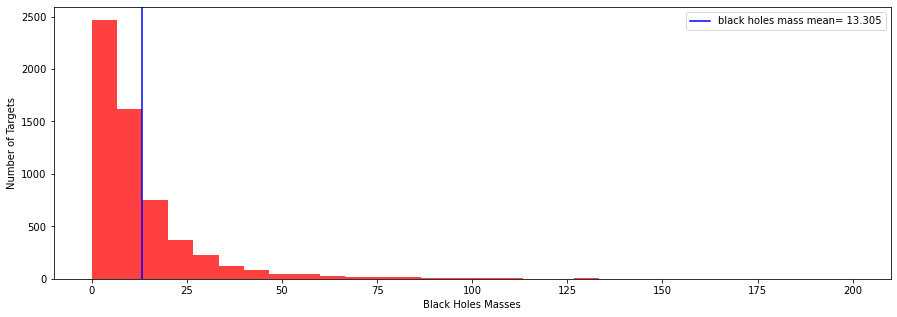

In [7]:
#Plot of all of the black hole masses
plt.figure(figsize = (15,5))
plt.hist(cor_units_bhm, range = (0,200), bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(cor_units_bhm),color='b', linestyle='solid', linewidth=1.5, label = 'black holes mass mean= '+ str(round(np.mean(cor_units_bhm), 3)))
plt.xlabel("Black Holes Masses")
plt.ylabel("Number of Targets")
plt.legend()

print(max(cor_units_bhm))
print(min(cor_units_bhm))

In [8]:
x = math.log10(10)
print(x)

1.0


In [9]:
#Grouping the BHM into FOUR groups 
bhm_group1 = []
bhm_group2 = []
bhm_group3 = []
bhm_group4 = []
bhm_group5 = []
bhm_group6 = []
bhm_group7 = []

for i in cor_units_bhm:
    if i*(10**8) <= 10**8:
        bhm_group1.append(i)
    elif i*(10**8) <= 10**8.5:
        bhm_group2.append(i)
    elif i*(10**8) <= 10**9:
        bhm_group3.append(i)
    elif i*(10**8) <= 10**9.5:
        bhm_group4.append(i)
    elif i*(10**8) <= 10**10:
        bhm_group5.append(i)
    elif i*(10**8) <= 10**10.5:
        bhm_group6.append(i)
    elif i*(10**8) <= 10**11:
        bhm_group7.append(i)
        
print(len(bhm_group1))
print(len(bhm_group2))
print(len(bhm_group3))
print(len(bhm_group4))
print(len(bhm_group5))
print(len(bhm_group6))
print(len(bhm_group7))

173
863
2426
1924
457
30
3


In [10]:
#Gathering mean of redshift for each group
bhm_g1 = np.mean(bhm_group1)
print("Mean for Group 1: ")
print(bhm_g1)
print()
bhm_g2 = np.mean(bhm_group2)
print("Mean for Group 2: ")
print(bhm_g2)
print()
bhm_g3 = np.mean(bhm_group3)
print("Mean for Group 3: ")
print(bhm_g3)
print()
bhm_g4 = np.mean(bhm_group4)
print("Mean for Group 4: ")
print(bhm_g4)
print()
bhm_g5 = np.mean(bhm_group5)
print("Mean for Group 5: ")
print(bhm_g5)
print()
bhm_g6 = np.mean(bhm_group6)
print("Mean for Group 6: ")
print(bhm_g6)
print()
bhm_g7 = np.mean(bhm_group7)
print("Mean for Group 7: ")
print(bhm_g7)
print()


Mean for Group 1: 
0.6632843923284568

Mean for Group 2: 
2.1490478540310662

Mean for Group 3: 
6.210709789648159

Mean for Group 4: 
17.175326660686416

Mean for Group 5: 
48.98102290696146

Mean for Group 6: 
129.22288874636453

Mean for Group 7: 
613.0810301538207



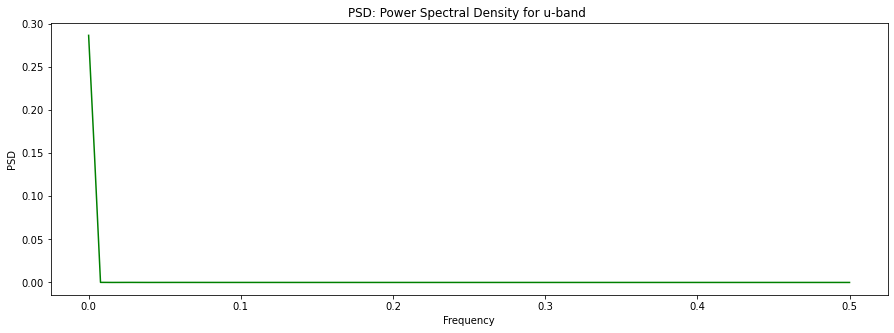

In [18]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c =8
            b = 3
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25#*(bhm_g1**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1= round(((y1[t])**0.25), 10)
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()


BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 1

PLOTTING




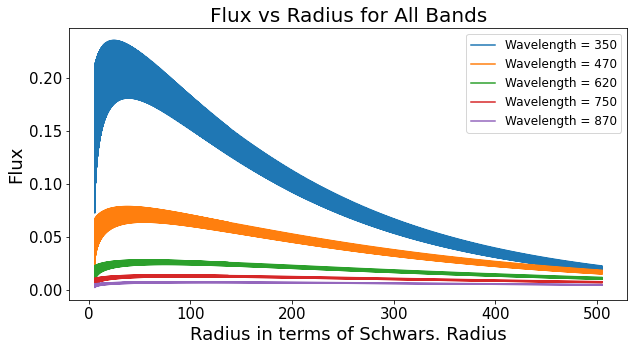

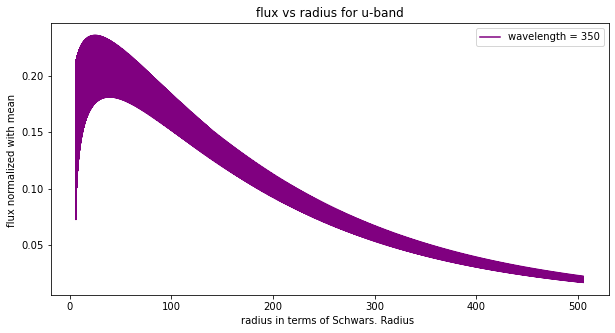

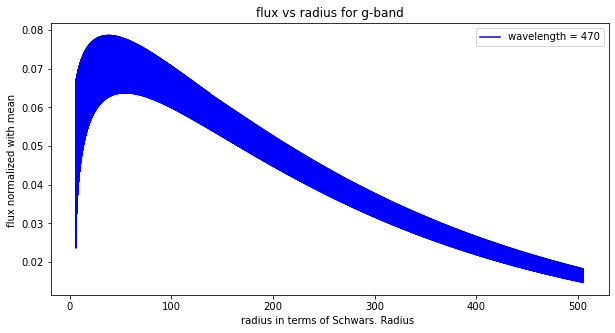

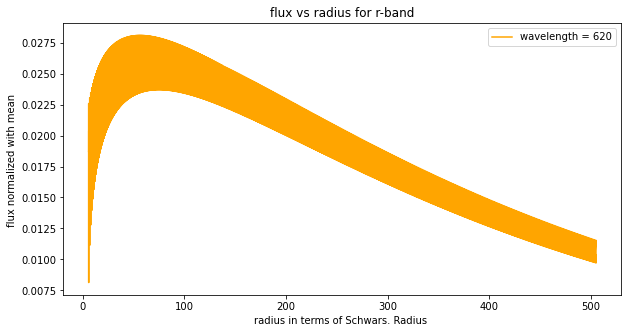

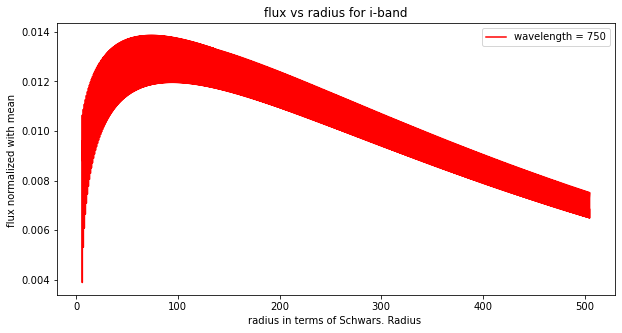

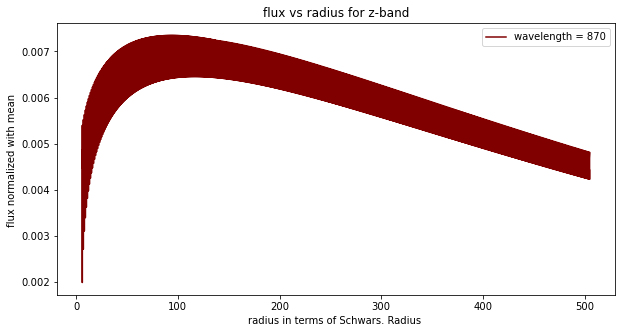


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.2850940781783435 Intercept: -1.4740469342261047


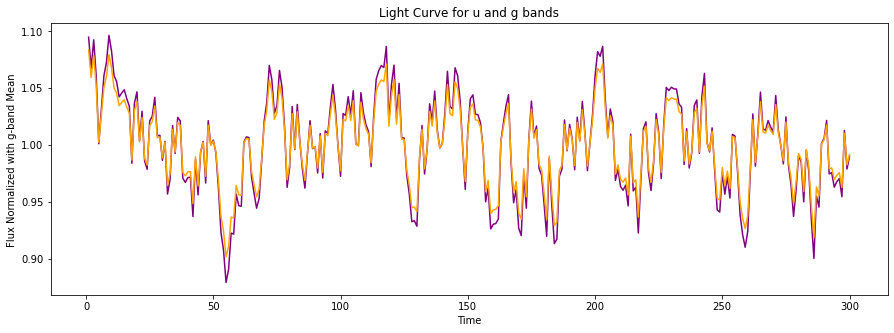

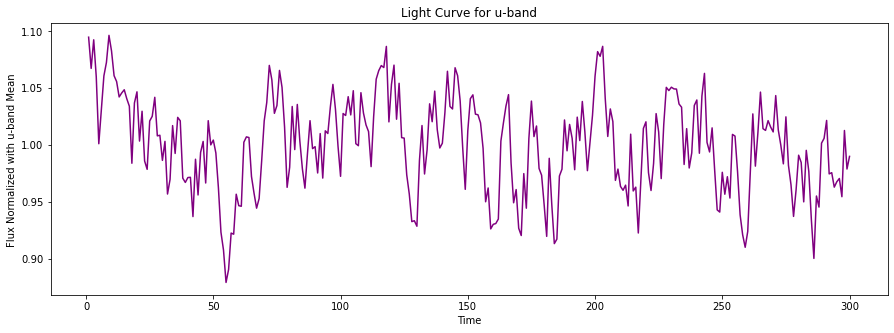

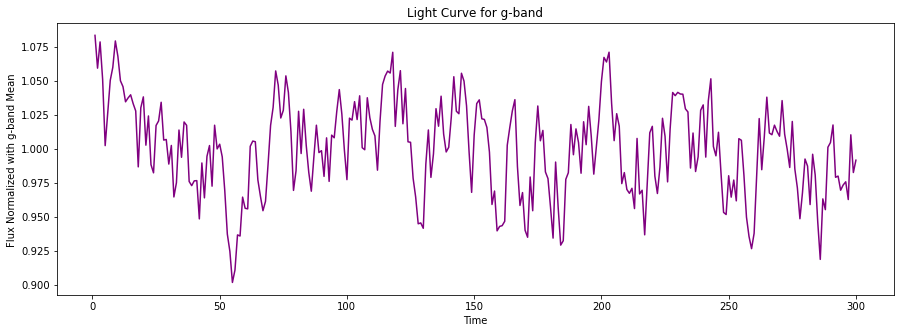

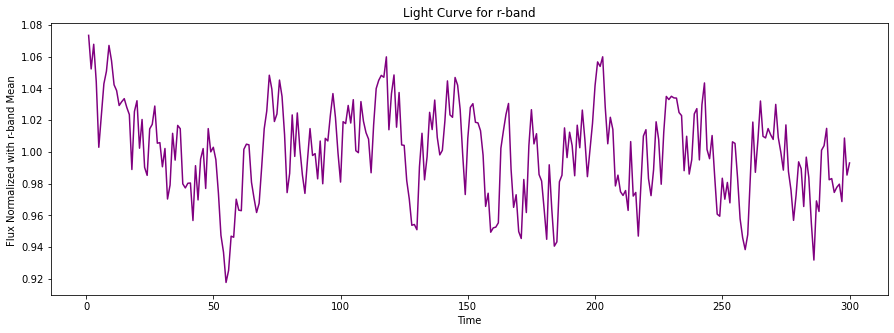

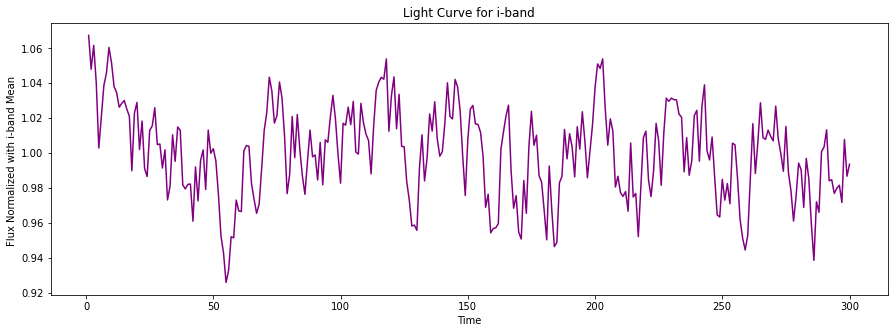

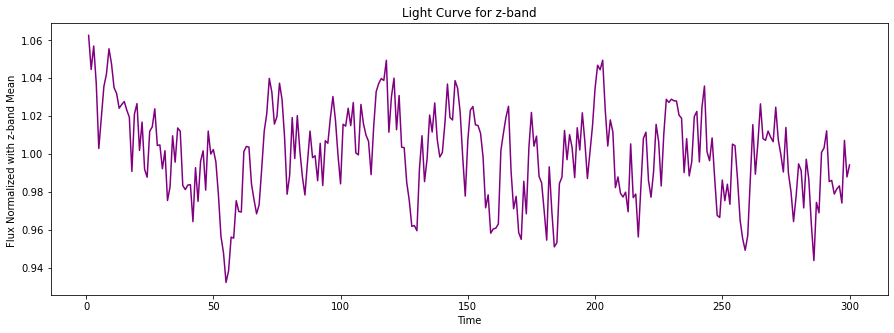

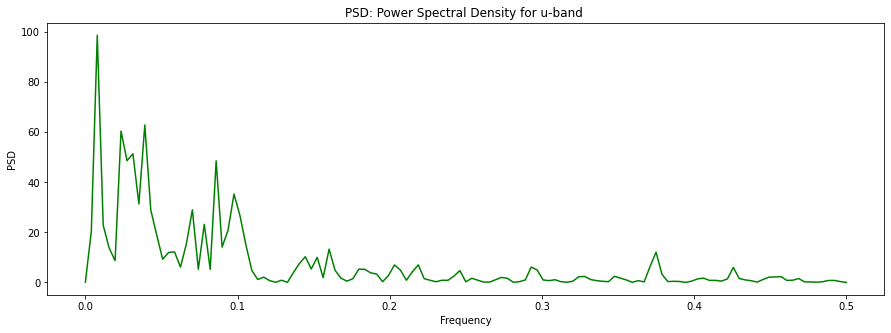

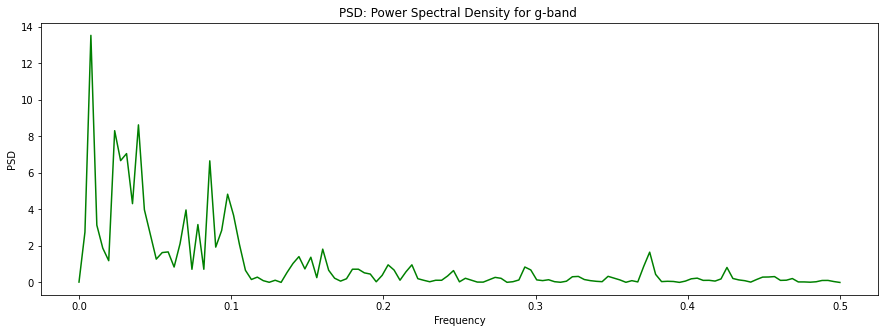

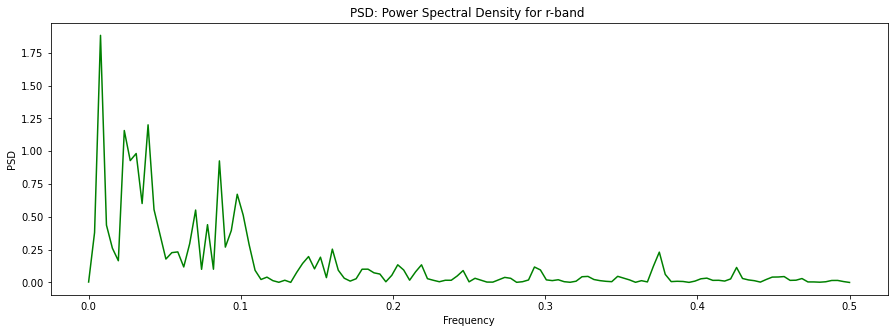

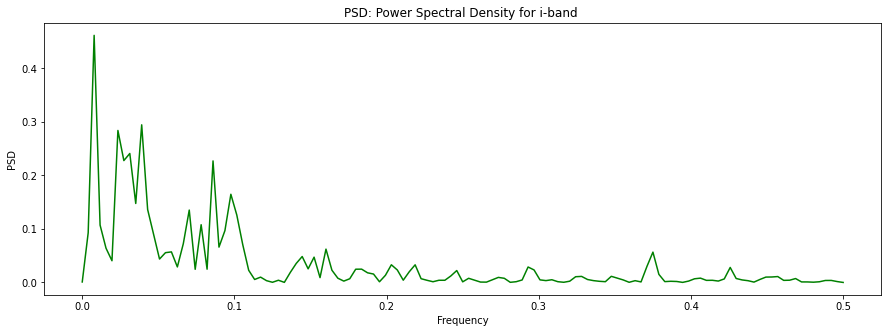

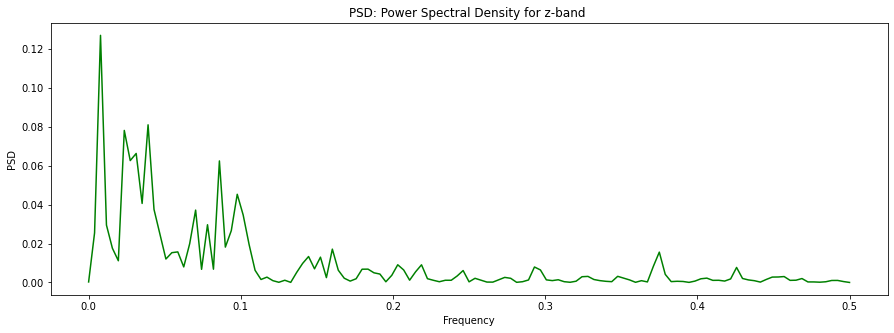

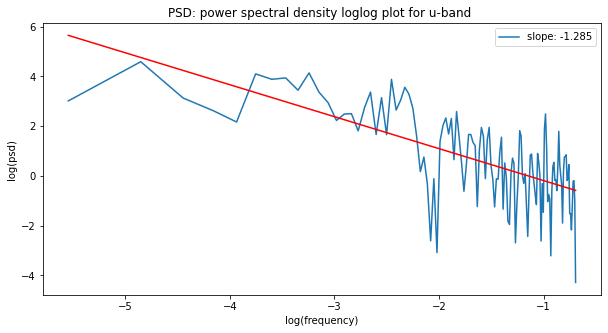


Slope: -1.2846853258603095 Intercept: -3.458625067830752


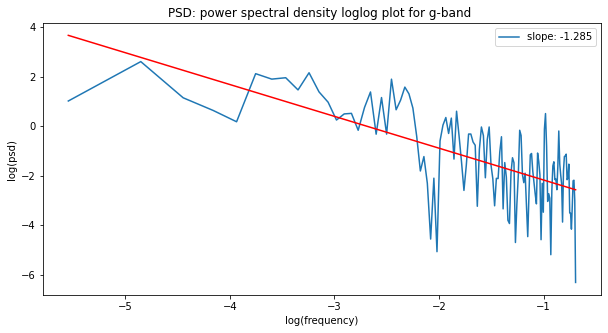


Slope: -1.2844213642754547 Intercept: -5.430065223351316


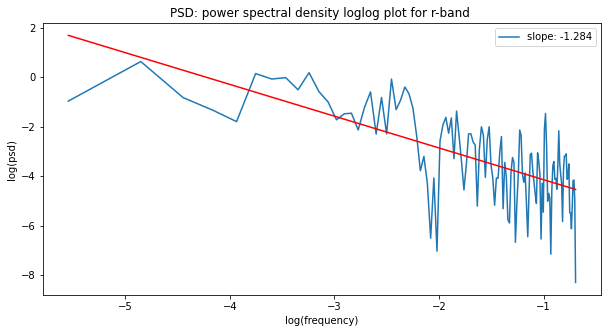


Slope: -1.284294879539524 Intercept: -6.8354072363271


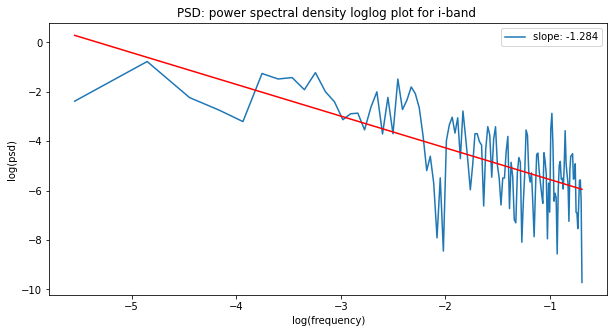


Slope: -1.2842108579428104 Intercept: -8.126507010420877


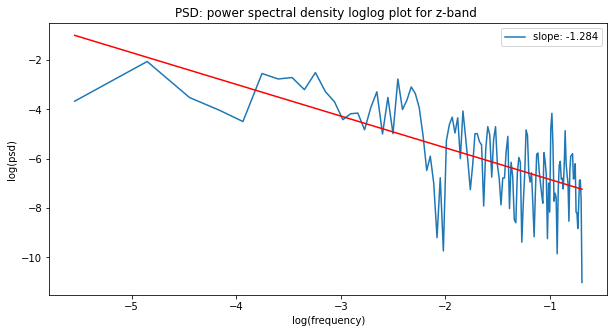


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.2172814625585835
u/r: 1.4427164923480043
u/i: 1.6024726171786474
u/z: 1.7449084949348013

g band

g/u: 0.8215026933032537
g/r: 1.1851954841369083
g/i: 1.3164355709569726
g/z: 1.4334470281566658

r band

r/u: 0.6931368742950402
r/g: 0.8437426680951516
r/i: 1.1107328610146003
r/z: 1.2094604201099712

i band

i/u: 0.6240356242471241
i/g: 0.7596269973721979
i/r: 0.900306486914008
i/z: 1.0888850618907486

z band

z/u: 0.5730959548324998
z/g: 0.6976190820849132
z/r: 0.8268149857347743
z/i: 0.9183705746349318



In [13]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 3.8
            b = 0.55
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g1**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1= round(((y1[t])**0.25), 10)
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 1")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'Wavelength = 350')
plt.plot(rr, lum2, label = 'Wavelength = 470')
plt.plot(rr, lum3, label = 'Wavelength = 620')
plt.plot(rr, lum4, label = 'Wavelength = 750')
plt.plot(rr, lum5, label = 'Wavelength = 870') 
plt.xlabel('Radius in terms of Schwars. Radius', size = 18) 
plt.ylabel('Flux', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Flux vs Radius for All Bands', size = 20)
plt.legend(prop={'size': 12})

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_1 = light1
AV_g_1 = light2
AV_r_1 = light3
AV_i_1 = light4
AV_z_1 = light5


print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_1 = (AV_u_1 / AV_g_1)
R_AV_ur_1 = (AV_u_1 / AV_r_1)
R_AV_ui_1 = (AV_u_1 / AV_i_1)
R_AV_uz_1 = (AV_u_1 / AV_z_1)

print("u/g:", + R_AV_ug_1)
print("u/r:", + R_AV_ur_1)
print("u/i:", + R_AV_ui_1)
print("u/z:", + R_AV_uz_1)

print()
print("g band")
print()
R_AV_gu_1 = AV_g_1/AV_u_1
R_AV_gr_1 = AV_g_1/AV_r_1
R_AV_gi_1 = AV_g_1/AV_i_1
R_AV_gz_1 = AV_g_1/AV_z_1

print("g/u:", + R_AV_gu_1)
print("g/r:", + R_AV_gr_1)
print("g/i:", + R_AV_gi_1)
print("g/z:", + R_AV_gz_1)
print()

print("r band")
print()
R_AV_ru_1 = AV_r_1/AV_u_1
R_AV_rg_1 = AV_r_1/AV_g_1
R_AV_ri_1 = AV_r_1/AV_i_1
R_AV_rz_1 = AV_r_1/AV_z_1

print("r/u:", + R_AV_ru_1)
print("r/g:", + R_AV_rg_1)
print("r/i:", + R_AV_ri_1)
print("r/z:", + R_AV_rz_1)
print()

print("i band")
print()
R_AV_iu_1 = AV_i_1/AV_u_1
R_AV_ig_1 = AV_i_1/AV_g_1
R_AV_ir_1 = AV_i_1/AV_r_1
R_AV_iz_1 = AV_i_1/AV_z_1

print("i/u:", + R_AV_iu_1)
print("i/g:", + R_AV_ig_1)
print("i/r:", + R_AV_ir_1)
print("i/z:", + R_AV_iz_1)
print()

print("z band")
print()
R_AV_zu_1 = AV_z_1/AV_u_1
R_AV_zg_1 = AV_z_1/AV_g_1
R_AV_zr_1 = AV_z_1/AV_r_1
R_AV_zi_1 = AV_z_1/AV_i_1

print("z/u:", + R_AV_zu_1)
print("z/g:", + R_AV_zg_1)
print("z/r:", + R_AV_zr_1)
print("z/i:", + R_AV_zi_1)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 2

PLOTTING




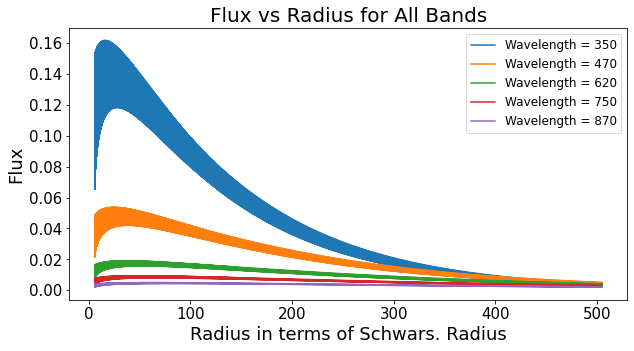

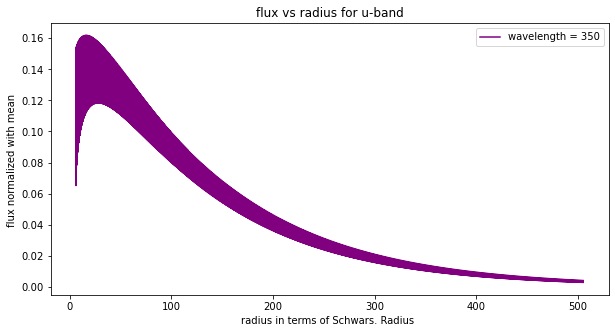

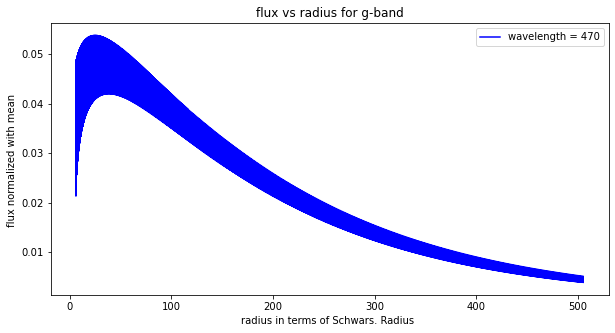

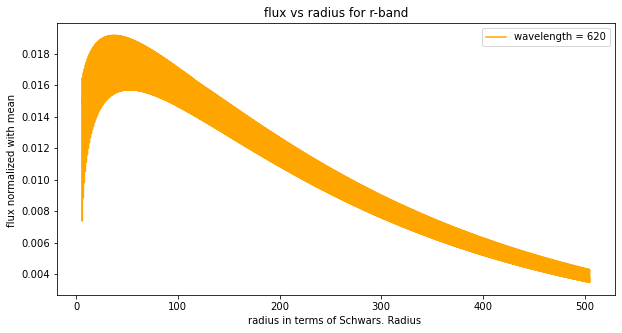

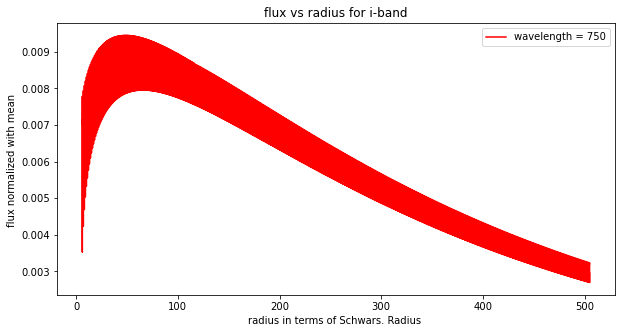

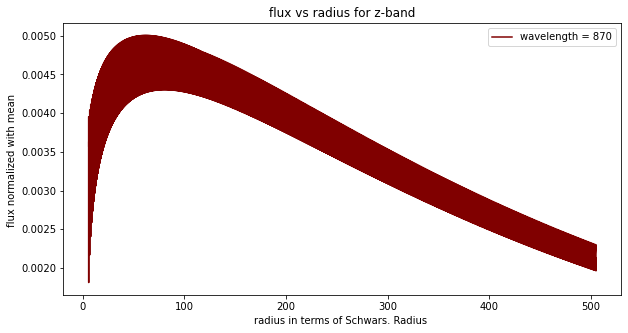


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs



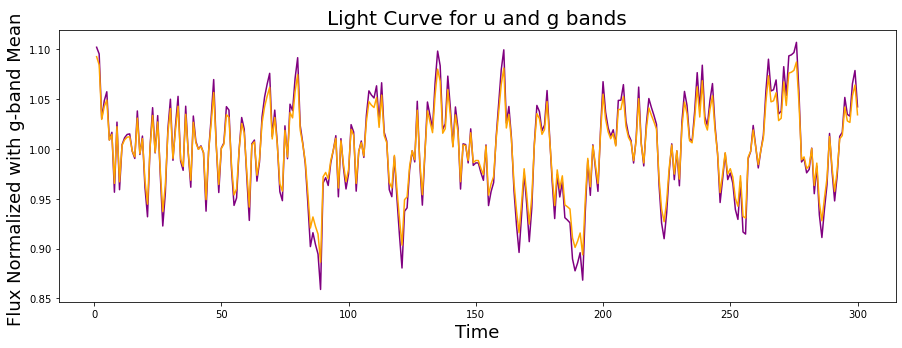

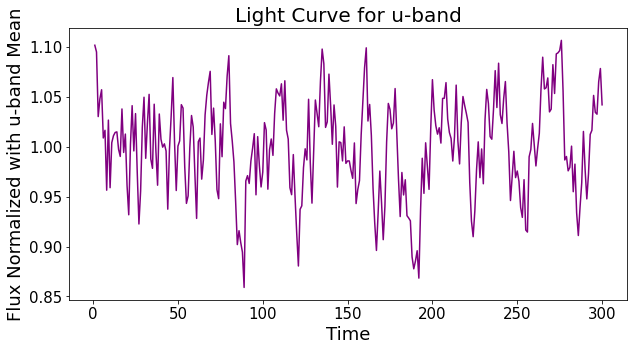

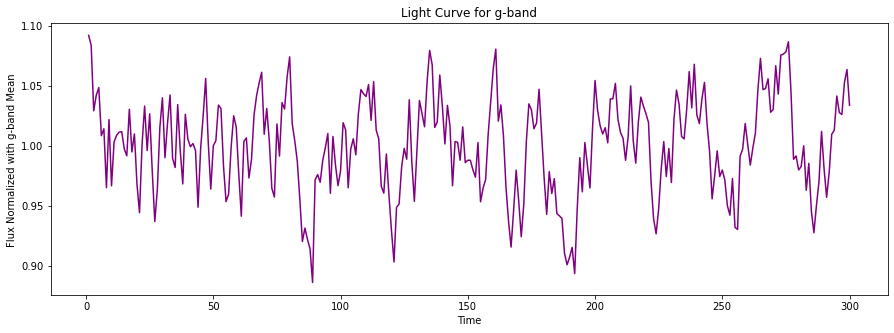

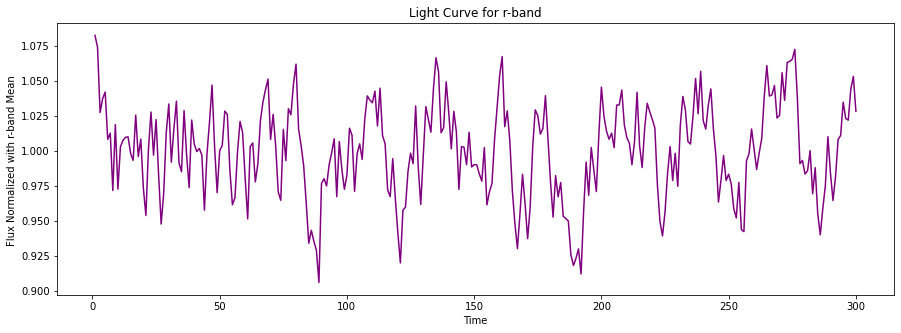

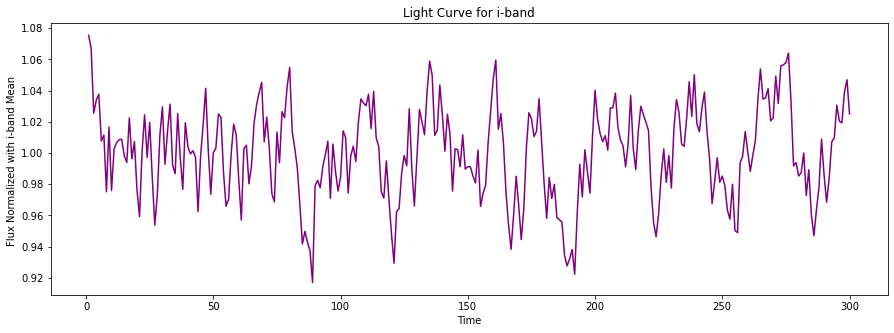

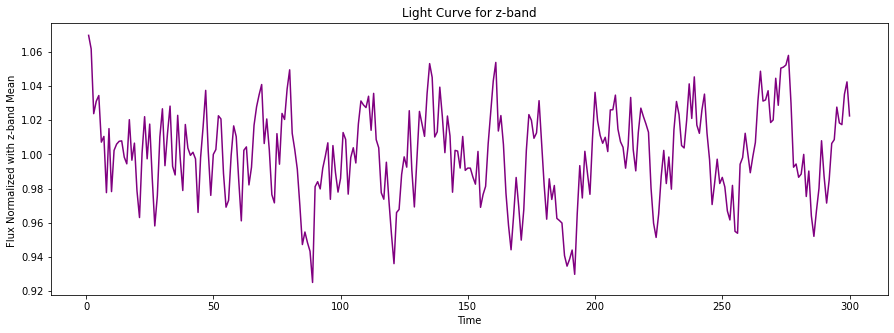

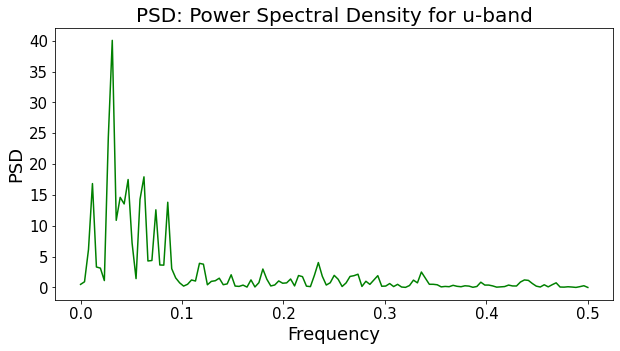

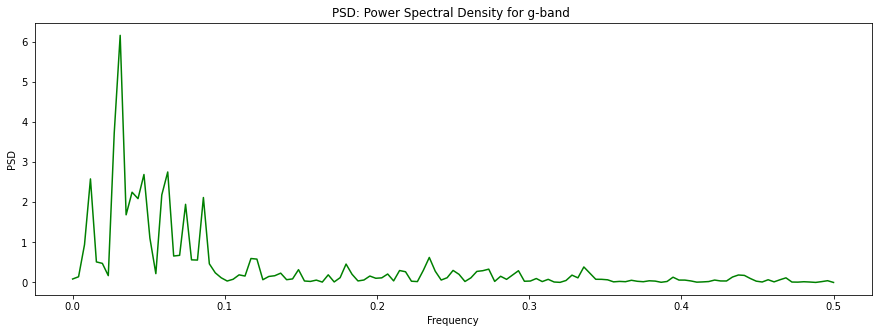

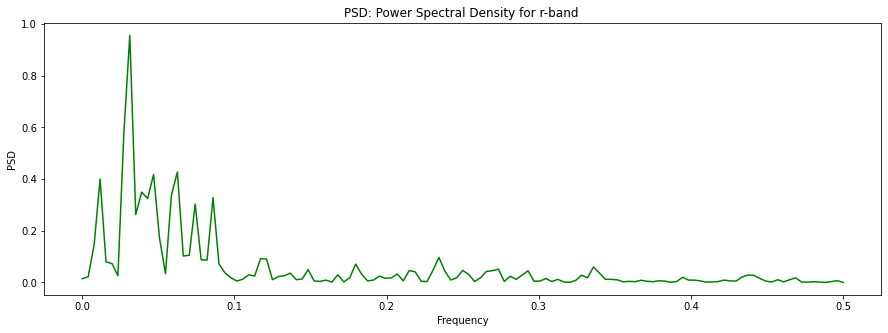

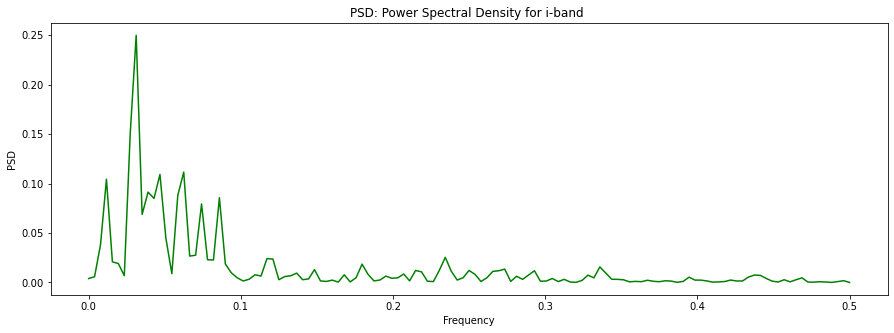

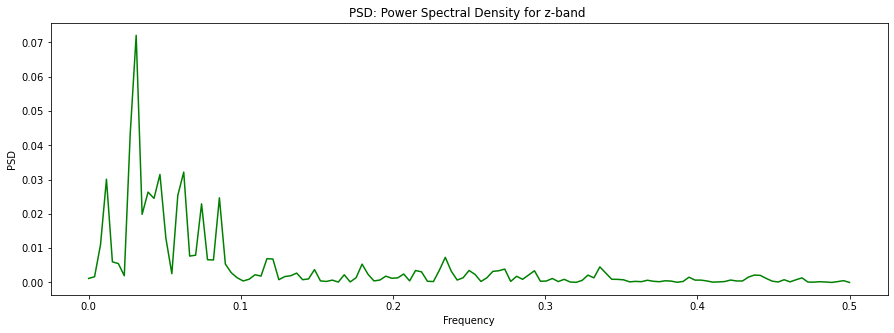

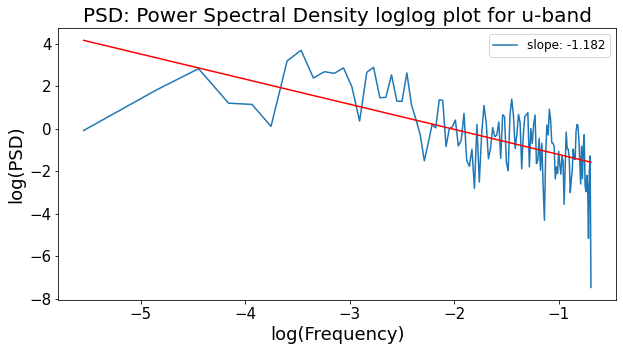


Slope: -1.1866712103206762 Intercept: -4.279855701356495


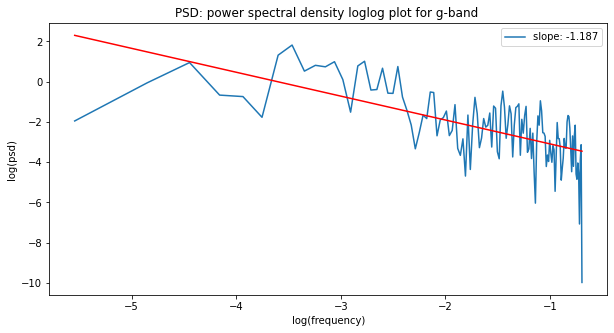


Slope: -1.1902986952101946 Intercept: -6.151530906689973


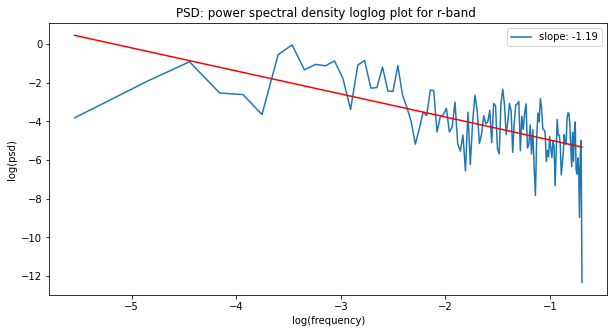


Slope: -1.192224819255492 Intercept: -7.497273753308536


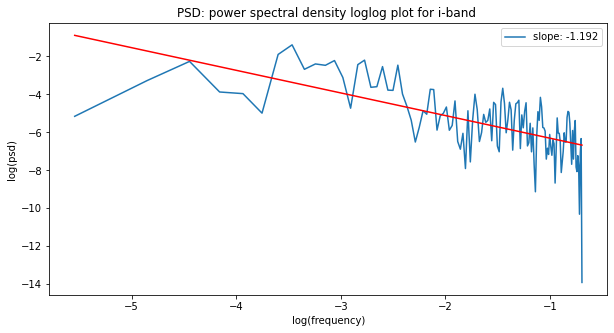


Slope: -1.1935358920622996 Intercept: -8.743913452918305


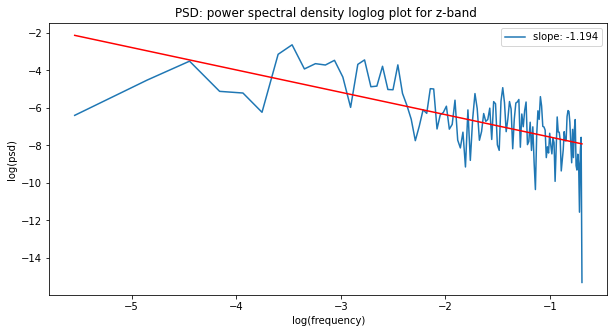


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.22595541869089
u/r: 1.4751411987383969
u/i: 1.6622753326043413
u/z: 1.8367574735091863

g band

g/u: 0.815690346283414
g/r: 1.2032584352158535
g/i: 1.3559019416704123
g/z: 1.4982253396053569

r band

r/u: 0.6779012075964269
r/g: 0.8310766587899375
r/i: 1.1268584553302352
r/z: 1.2451401093536394

i band

i/u: 0.6015850565701816
i/g: 0.7375164599056797
i/r: 0.8874229014920438
i/z: 1.1049658486067275

z band

z/u: 0.5444376921954027
z/g: 0.667456338886517
z/r: 0.8031224699034928
z/i: 0.9050053458764531



In [161]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 3.8
            b = 0.55
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g2**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=(y1[t])**0.25
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 2")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'Wavelength = 350')
plt.plot(rr, lum2, label = 'Wavelength = 470')
plt.plot(rr, lum3, label = 'Wavelength = 620')
plt.plot(rr, lum4, label = 'Wavelength = 750')
plt.plot(rr, lum5, label = 'Wavelength = 870') 
plt.xlabel('Radius in terms of Schwars. Radius', size = 18) 
plt.ylabel('Flux', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Flux vs Radius for All Bands', size = 20)
plt.legend(prop={'size': 12})

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time', size = 18)
plt.ylabel('Flux Normalized with u-band Mean', size = 18)
plt.title('Light Curve for u and g bands', size = 20)# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (10,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time', size = 18)
plt.ylabel('Flux Normalized with u-band Mean', size = 18)
plt.title('Light Curve for u-band', size = 20)# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (10,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency', size = 18)
plt.ylabel('PSD', size = 18)
plt.title('PSD: Power Spectral Density for u-band', size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: Power Spectral Density loglog plot for u-band', size = 20) 
plt.xlabel('log(Frequency)', size = 18)
plt.ylabel('log(PSD)', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend(prop={'size': 12})
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_2 = light1
AV_g_2 = light2
AV_r_2 = light3
AV_i_2 = light4
AV_z_2 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_2 = (AV_u_2 / AV_g_2)
R_AV_ur_2 = (AV_u_2 / AV_r_2)
R_AV_ui_2 = (AV_u_2 / AV_i_2)
R_AV_uz_2 = (AV_u_2 / AV_z_2)

print("u/g:", + R_AV_ug_2)
print("u/r:", + R_AV_ur_2)
print("u/i:", + R_AV_ui_2)
print("u/z:", + R_AV_uz_2)

print()
print("g band")
print()
R_AV_gu_2 = AV_g_2/AV_u_2
R_AV_gr_2 = AV_g_2/AV_r_2
R_AV_gi_2 = AV_g_2/AV_i_2
R_AV_gz_2 = AV_g_2/AV_z_2

print("g/u:", + R_AV_gu_2)
print("g/r:", + R_AV_gr_2)
print("g/i:", + R_AV_gi_2)
print("g/z:", + R_AV_gz_2)
print()

print("r band")
print()
R_AV_ru_2 = AV_r_2/AV_u_2
R_AV_rg_2 = AV_r_2/AV_g_2
R_AV_ri_2 = AV_r_2/AV_i_2
R_AV_rz_2 = AV_r_2/AV_z_2

print("r/u:", + R_AV_ru_2)
print("r/g:", + R_AV_rg_2)
print("r/i:", + R_AV_ri_2)
print("r/z:", + R_AV_rz_2)
print()

print("i band")
print()
R_AV_iu_2 = AV_i_2/AV_u_2
R_AV_ig_2 = AV_i_2/AV_g_2
R_AV_ir_2 = AV_i_2/AV_r_2
R_AV_iz_2 = AV_i_2/AV_z_2

print("i/u:", + R_AV_iu_2)
print("i/g:", + R_AV_ig_2)
print("i/r:", + R_AV_ir_2)
print("i/z:", + R_AV_iz_2)
print()

print("z band")
print()
R_AV_zu_2 = AV_z_2/AV_u_2
R_AV_zg_2 = AV_z_2/AV_g_2
R_AV_zr_2 = AV_z_2/AV_r_2
R_AV_zi_2 = AV_z_2/AV_i_2

print("z/u:", + R_AV_zu_2)
print("z/g:", + R_AV_zg_2)
print("z/r:", + R_AV_zr_2)
print("z/i:", + R_AV_zi_2)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 3

PLOTTING




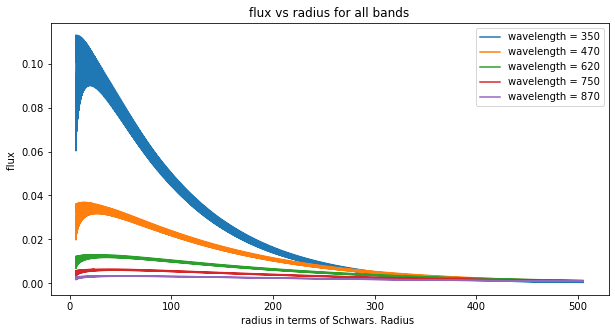

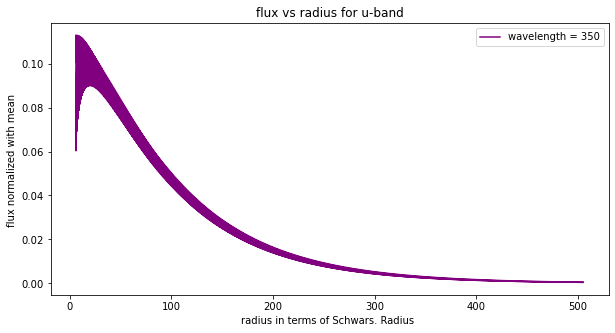

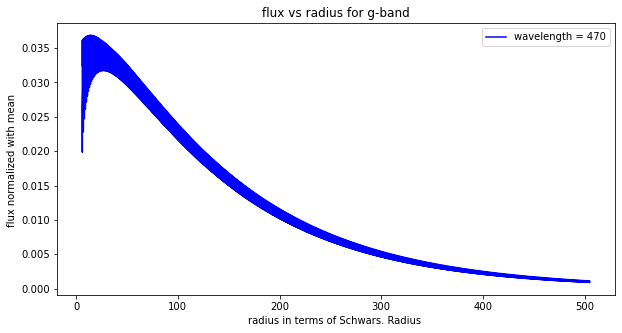

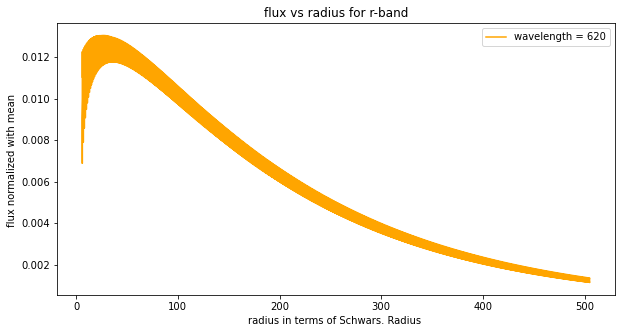

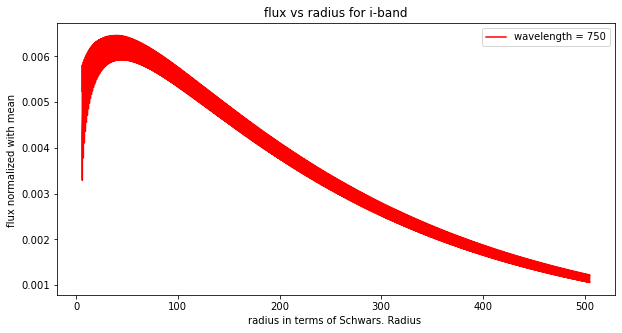

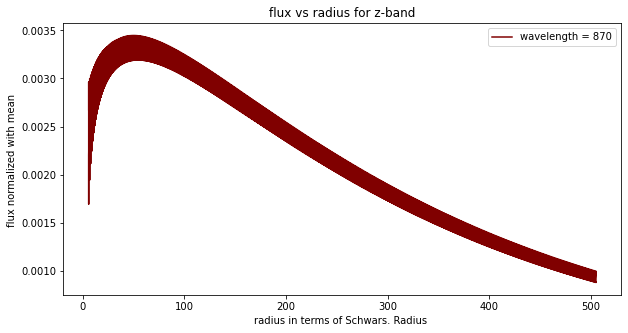


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.355691966399766 Intercept: -5.916133554295638


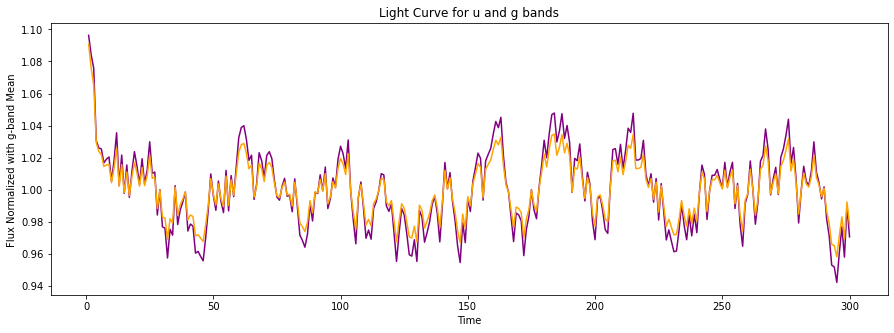

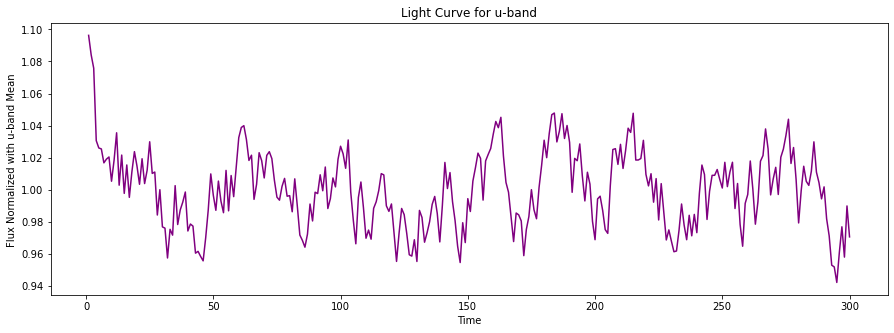

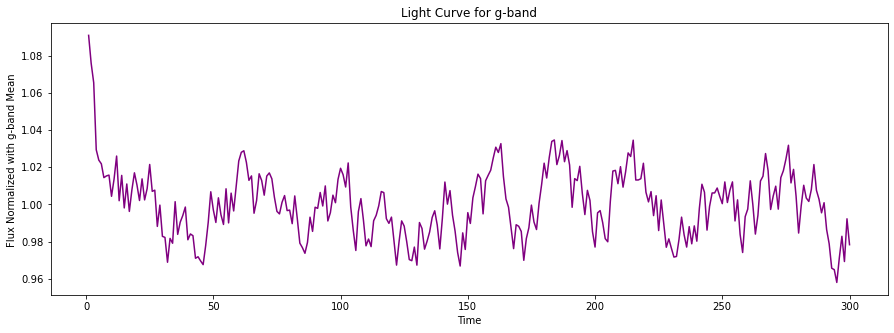

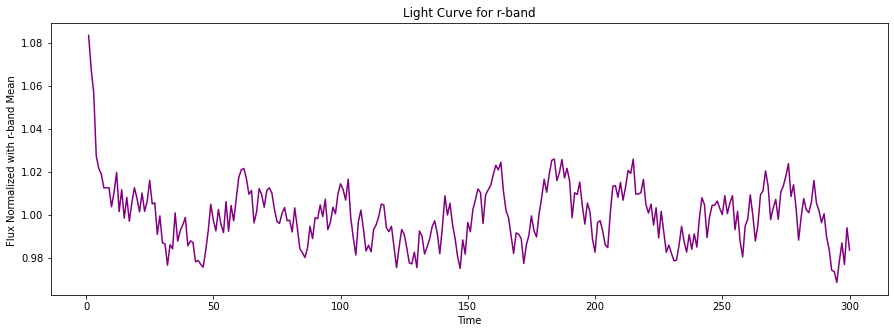

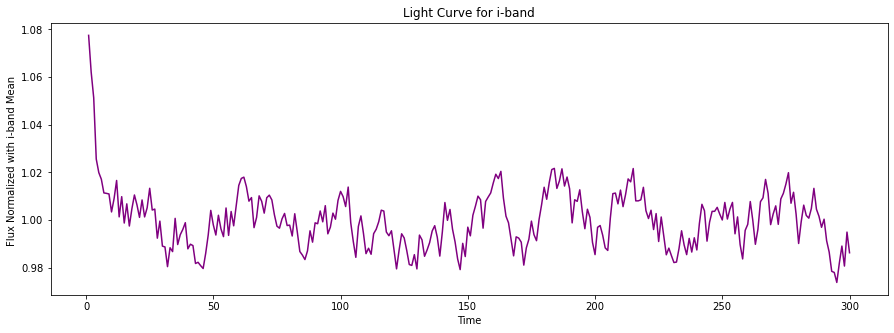

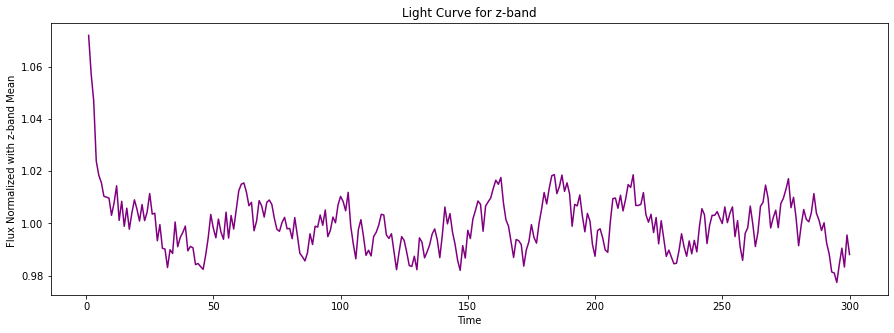

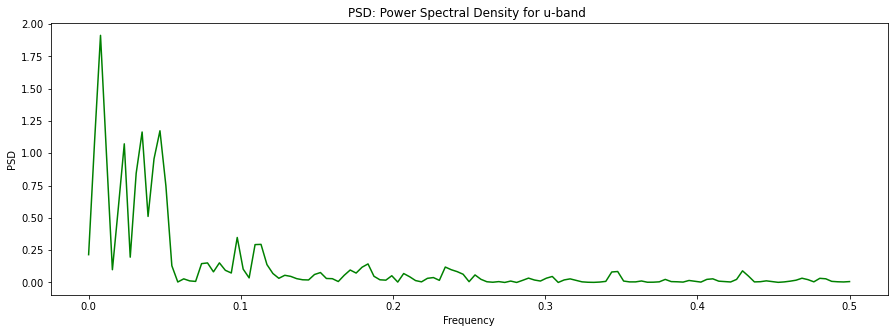

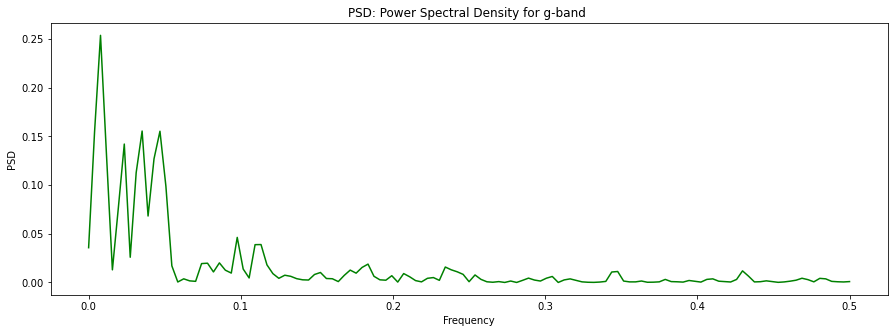

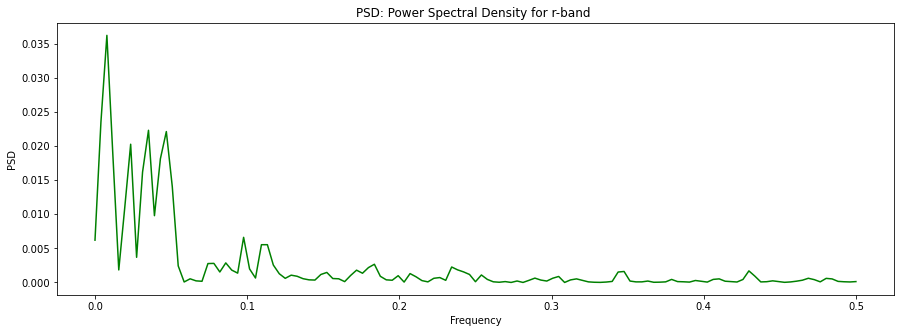

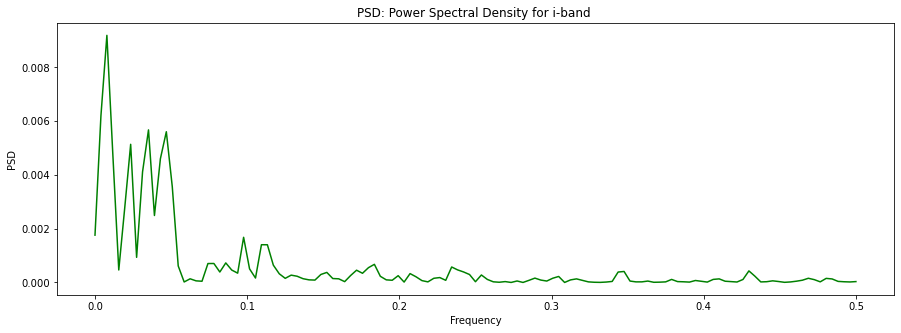

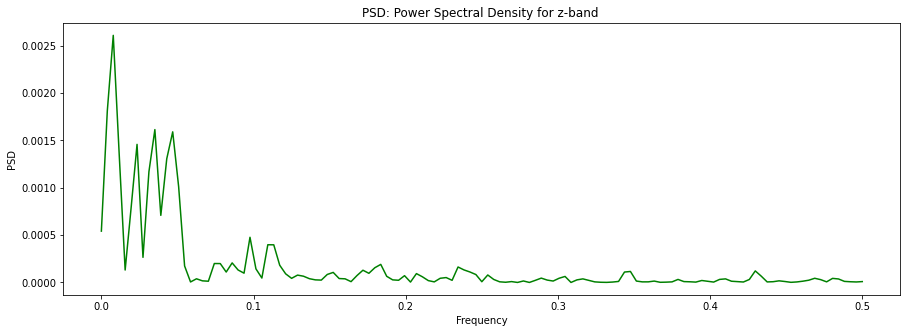

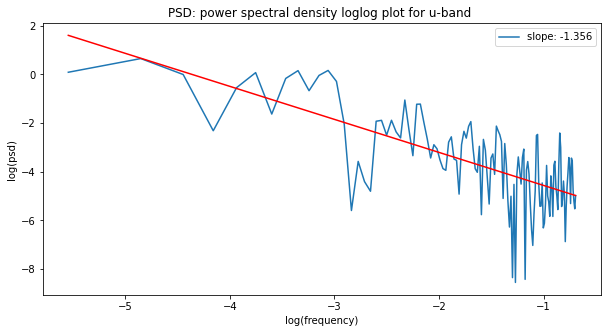


Slope: -1.3605403251388706 Intercept: -7.947327973414552


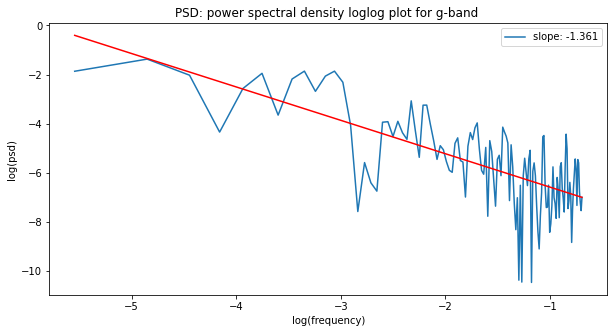


Slope: -1.36464438051175 Intercept: -9.903763384617653


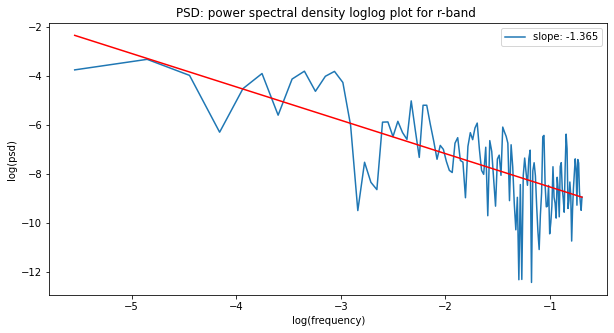


Slope: -1.3669865977938804 Intercept: -11.280935621744904


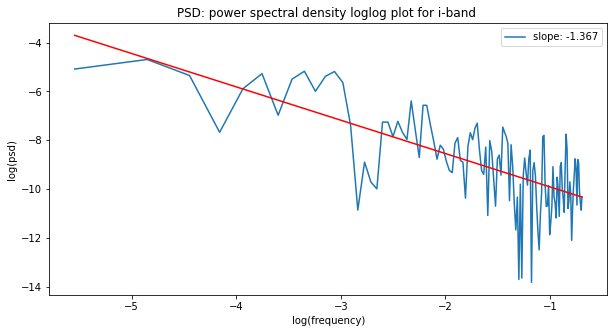


Slope: -1.368704380293777 Intercept: -12.54306253906123


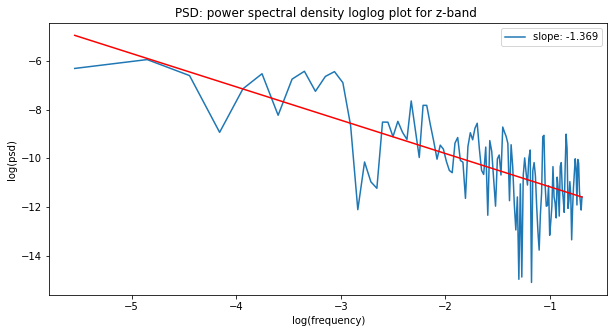


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.3236647448876455
u/r: 1.6850482640911282
u/i: 1.9600284100628282
u/z: 2.22091443611311

g band

g/u: 0.7554783066197637
g/r: 1.273017409128138
g/i: 1.4807589441608933
g/z: 1.6778526773421198

r band

r/u: 0.5934548115388103
r/g: 0.7855352117178651
r/i: 1.1631882907045497
r/z: 1.318012358127329

i band

i/u: 0.5101966863673906
i/g: 0.6753293667030142
i/r: 0.8597060407084174
i/z: 1.1331031860104106

z band

z/u: 0.45026498263036663
z/g: 0.5959998833652643
z/r: 0.7587182273623213
z/i: 0.8825321580119644



In [110]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 7.5
            b = 1.0
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g3**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=(y1[t])**0.25
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 3")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'wavelength = 350')
plt.plot(rr, lum2, label = 'wavelength = 470')
plt.plot(rr, lum3, label = 'wavelength = 620')
plt.plot(rr, lum4, label = 'wavelength = 750')
plt.plot(rr, lum5, label = 'wavelength = 870') 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_3 = light1
AV_g_3 = light2
AV_r_3 = light3
AV_i_3 = light4
AV_z_3 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_3 = (AV_u_3 / AV_g_3)
R_AV_ur_3 = (AV_u_3 / AV_r_3)
R_AV_ui_3 = (AV_u_3 / AV_i_3)
R_AV_uz_3 = (AV_u_3 / AV_z_3)

print("u/g:", + R_AV_ug_3)
print("u/r:", + R_AV_ur_3)
print("u/i:", + R_AV_ui_3)
print("u/z:", + R_AV_uz_3)

print()
print("g band")
print()
R_AV_gu_3 = AV_g_3/AV_u_3
R_AV_gr_3 = AV_g_3/AV_r_3
R_AV_gi_3 = AV_g_3/AV_i_3
R_AV_gz_3 = AV_g_3/AV_z_3

print("g/u:", + R_AV_gu_3)
print("g/r:", + R_AV_gr_3)
print("g/i:", + R_AV_gi_3)
print("g/z:", + R_AV_gz_3)
print()

print("r band")
print()
R_AV_ru_3 = AV_r_3/AV_u_3
R_AV_rg_3 = AV_r_3/AV_g_3
R_AV_ri_3 = AV_r_3/AV_i_3
R_AV_rz_3 = AV_r_3/AV_z_3

print("r/u:", + R_AV_ru_3)
print("r/g:", + R_AV_rg_3)
print("r/i:", + R_AV_ri_3)
print("r/z:", + R_AV_rz_3)
print()

print("i band")
print()
R_AV_iu_3 = AV_i_3/AV_u_3
R_AV_ig_3 = AV_i_3/AV_g_3
R_AV_ir_3 = AV_i_3/AV_r_3
R_AV_iz_3 = AV_i_3/AV_z_3

print("i/u:", + R_AV_iu_3)
print("i/g:", + R_AV_ig_3)
print("i/r:", + R_AV_ir_3)
print("i/z:", + R_AV_iz_3)
print()

print("z band")
print()
R_AV_zu_3 = AV_z_3/AV_u_3
R_AV_zg_3 = AV_z_3/AV_g_3
R_AV_zr_3 = AV_z_3/AV_r_3
R_AV_zi_3 = AV_z_3/AV_i_3

print("z/u:", + R_AV_zu_3)
print("z/g:", + R_AV_zg_3)
print("z/r:", + R_AV_zr_3)
print("z/i:", + R_AV_zi_3)
print()

2.8070340999469297
2.100011665758964
1.6276503882092292
1.38411437421719
1.208268179887322

BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 4

PLOTTING




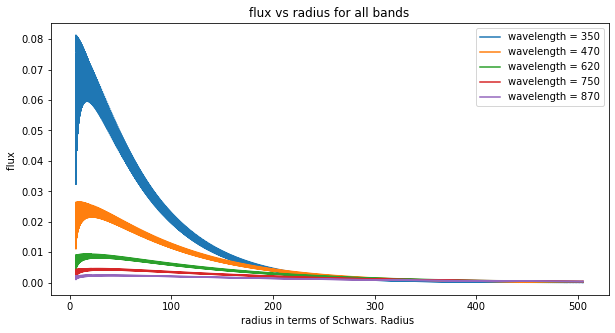

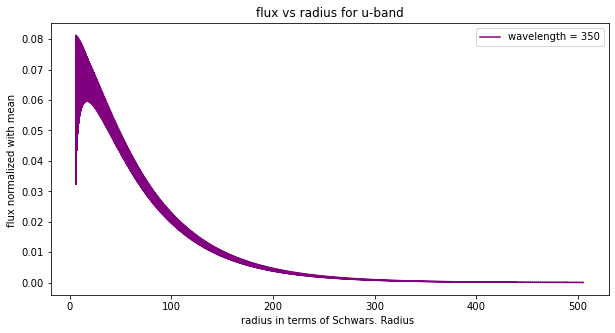

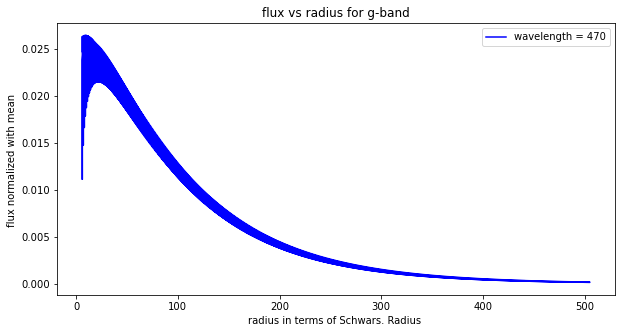

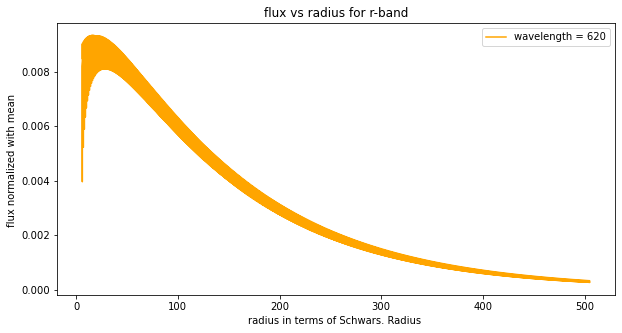

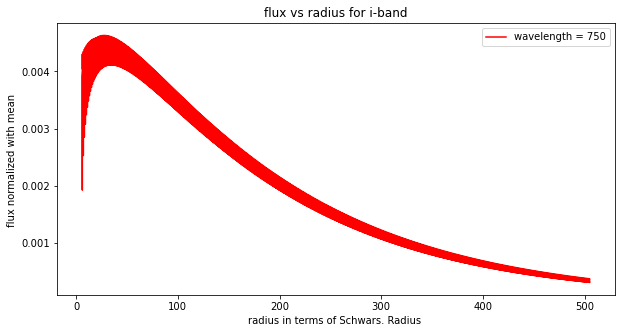

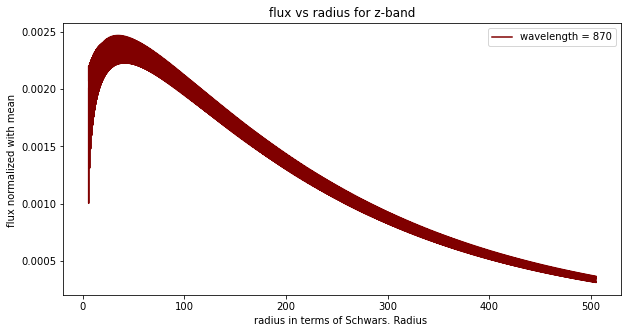


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -0.8854699093152125 Intercept: -5.863467119231425


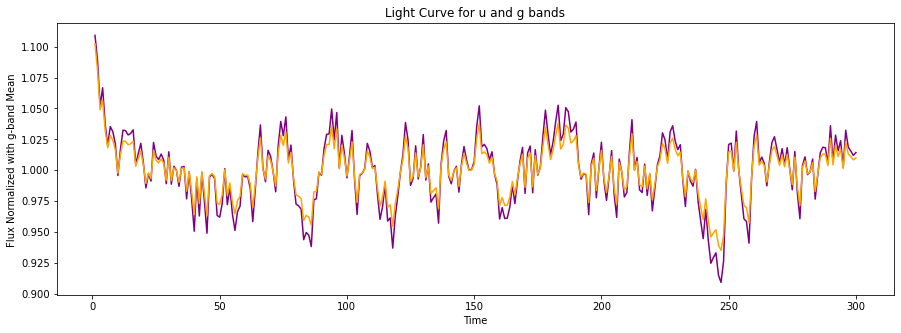

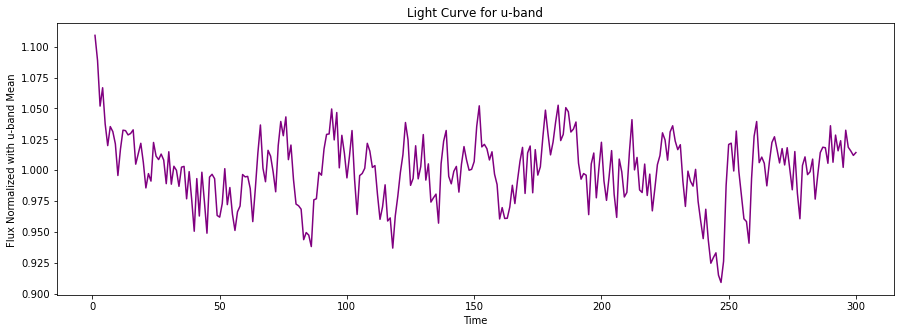

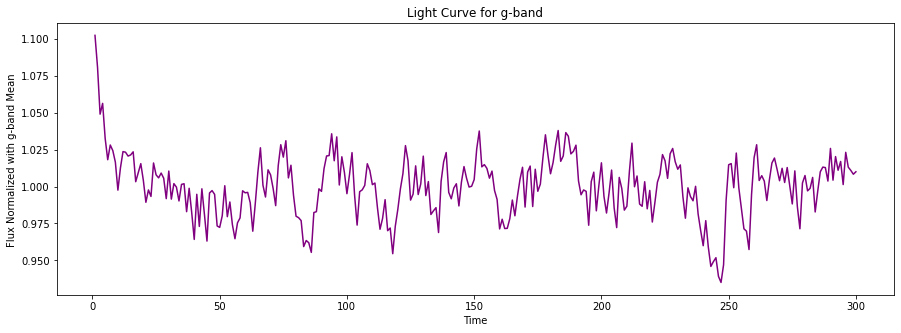

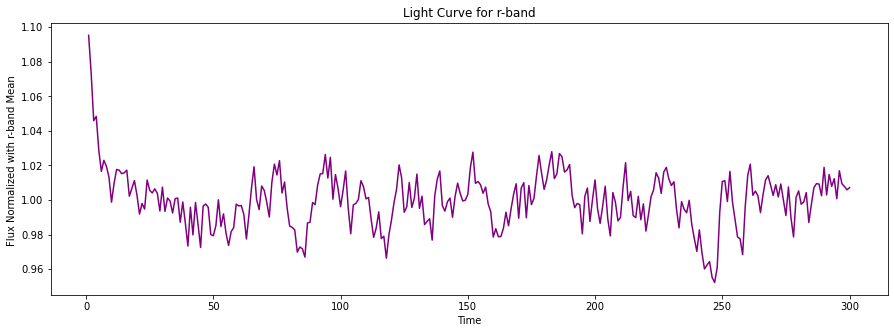

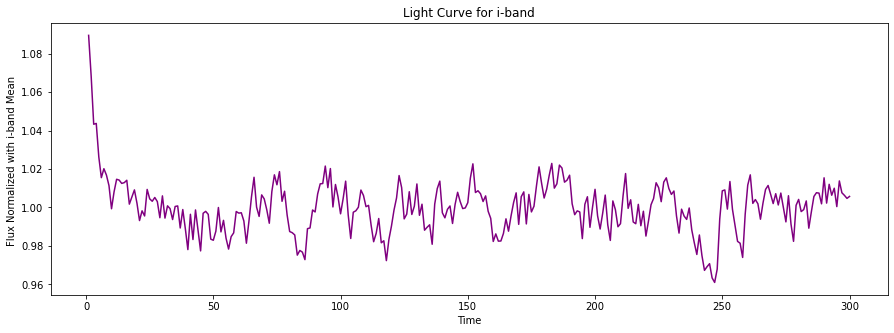

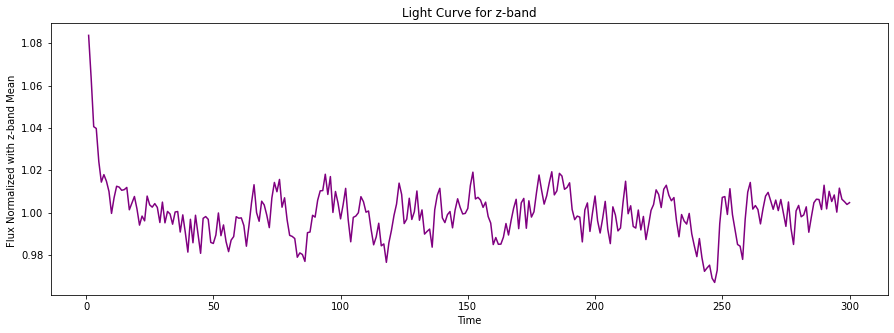

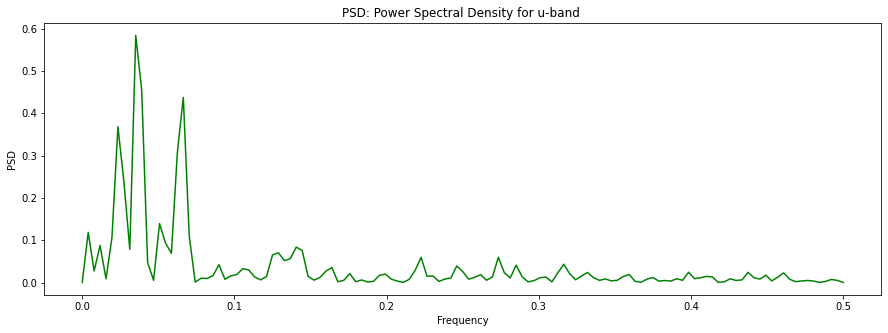

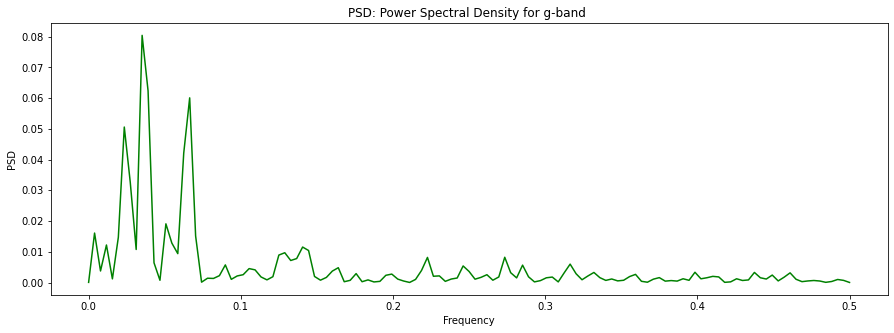

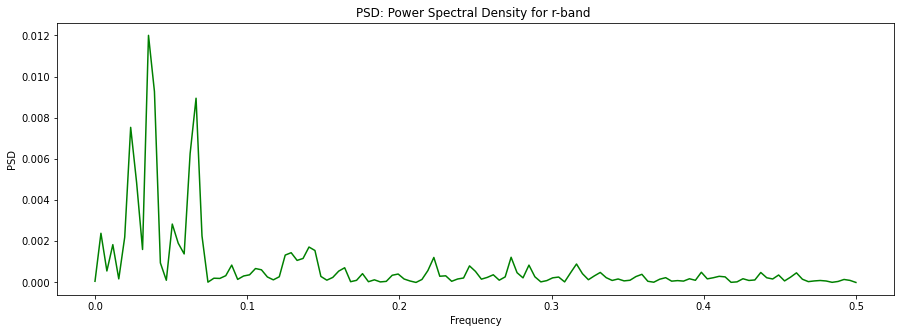

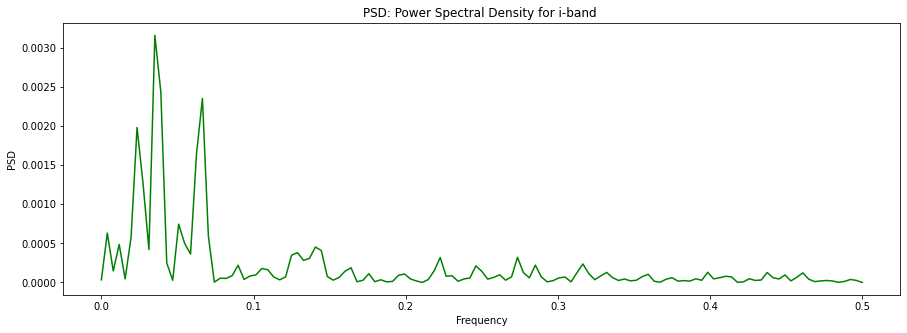

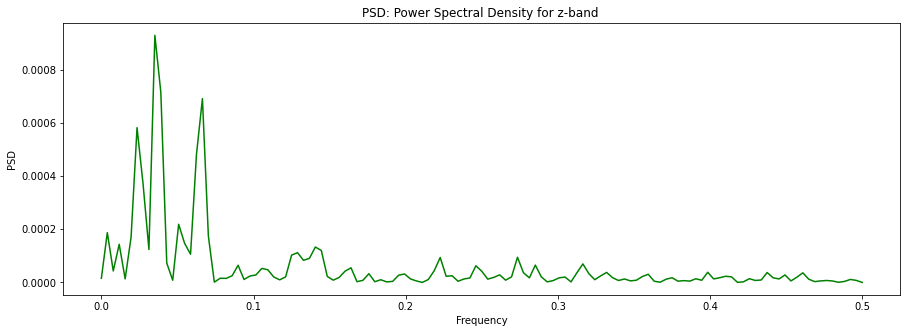

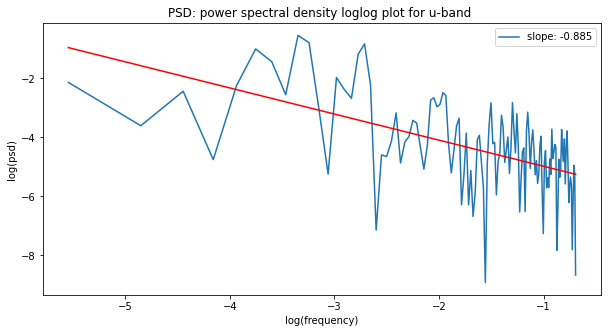


Slope: -0.8859200038435564 Intercept: -7.848012095841597


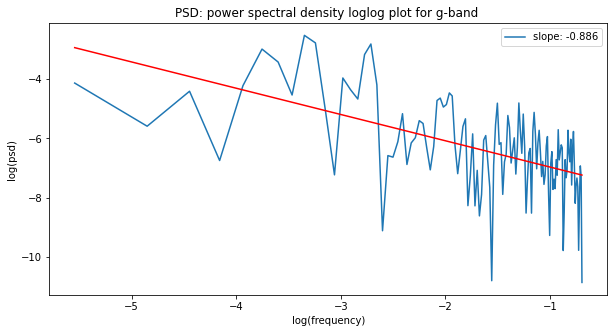


Slope: -0.8867362034756926 Intercept: -9.752914220795637


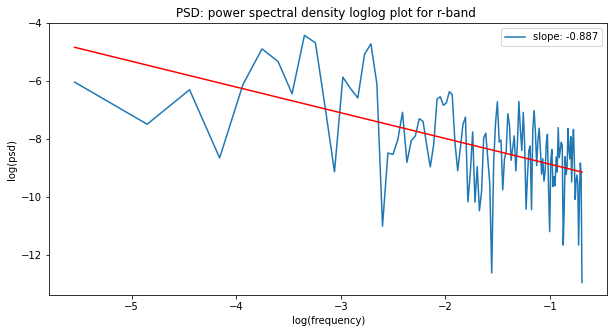


Slope: -0.8875270128289925 Intercept: -11.090014201452759


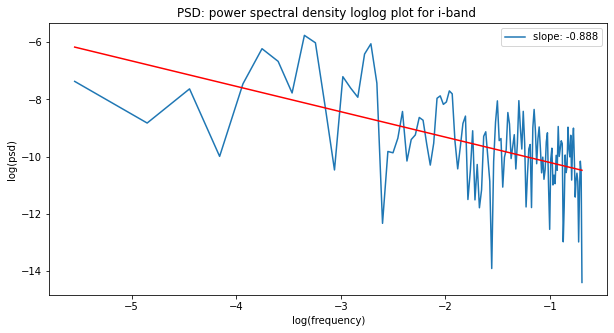


Slope: -0.8883323208501475 Intercept: -12.315352756849975


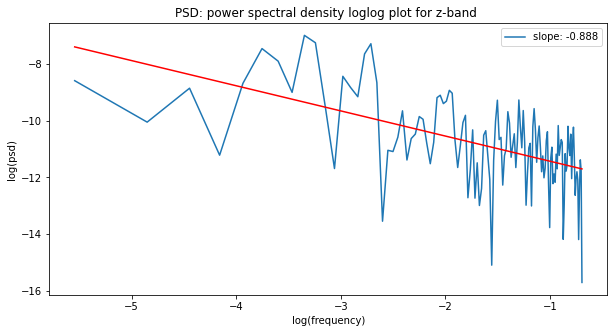


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.336675479339512
u/r: 1.7245927751323058
u/i: 2.028036231857282
u/z: 2.3231879699163325

g band

g/u: 0.7481247434075229
g/r: 1.2902105273783242
g/i: 1.5172240855793886
g/z: 1.7380344038811002

r band

r/u: 0.5798470308002321
r/g: 0.775067307838493
r/i: 1.175950787397736
r/z: 1.3470936463468044

i band

i/u: 0.4930878375304947
i/g: 0.6590984215875573
i/r: 0.8503757221107033
i/z: 1.1455357322629043

z band

z/u: 0.4304430002863755
z/g: 0.5753626037361286
z/r: 0.7423388884001563
z/i: 0.8729540003301238



In [111]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 7.5
            b = 1.0
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g4**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=(y1[t])**0.25
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print(light1)
print(light2)
print(light3)
print(light4)
print(light5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 4")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'wavelength = 350')
plt.plot(rr, lum2, label = 'wavelength = 470')
plt.plot(rr, lum3, label = 'wavelength = 620')
plt.plot(rr, lum4, label = 'wavelength = 750')
plt.plot(rr, lum5, label = 'wavelength = 870') 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_4 = light1
AV_g_4 = light2
AV_r_4 = light3
AV_i_4 = light4
AV_z_4 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_4 = (AV_u_4 / AV_g_4)
R_AV_ur_4 = (AV_u_4 / AV_r_4)
R_AV_ui_4 = (AV_u_4 / AV_i_4)
R_AV_uz_4 = (AV_u_4 / AV_z_4)

print("u/g:", + R_AV_ug_4)
print("u/r:", + R_AV_ur_4)
print("u/i:", + R_AV_ui_4)
print("u/z:", + R_AV_uz_4)

print()
print("g band")
print()
R_AV_gu_4 = AV_g_4/AV_u_4
R_AV_gr_4 = AV_g_4/AV_r_4
R_AV_gi_4 = AV_g_4/AV_i_4
R_AV_gz_4 = AV_g_4/AV_z_4

print("g/u:", + R_AV_gu_4)
print("g/r:", + R_AV_gr_4)
print("g/i:", + R_AV_gi_4)
print("g/z:", + R_AV_gz_4)
print()

print("r band")
print()
R_AV_ru_4 = AV_r_4/AV_u_4
R_AV_rg_4 = AV_r_4/AV_g_4
R_AV_ri_4 = AV_r_4/AV_i_4
R_AV_rz_4 = AV_r_4/AV_z_4

print("r/u:", + R_AV_ru_4)
print("r/g:", + R_AV_rg_4)
print("r/i:", + R_AV_ri_4)
print("r/z:", + R_AV_rz_4)
print()

print("i band")
print()
R_AV_iu_4 = AV_i_4/AV_u_4
R_AV_ig_4 = AV_i_4/AV_g_4
R_AV_ir_4 = AV_i_4/AV_r_4
R_AV_iz_4 = AV_i_4/AV_z_4

print("i/u:", + R_AV_iu_4)
print("i/g:", + R_AV_ig_4)
print("i/r:", + R_AV_ir_4)
print("i/z:", + R_AV_iz_4)
print()

print("z band")
print()
R_AV_zu_4 = AV_z_4/AV_u_4
R_AV_zg_4 = AV_z_4/AV_g_4
R_AV_zr_4 = AV_z_4/AV_r_4
R_AV_zi_4 = AV_z_4/AV_i_4

print("z/u:", + R_AV_zu_4)
print("z/g:", + R_AV_zg_4)
print("z/r:", + R_AV_zr_4)
print("z/i:", + R_AV_zi_4)
print()


FWHM: 0.07508440543337491
FWHM: 0.02548071975816276
FWHM: 0.009229532333109596
FWHM: 0.004592757359748469
FWHM: 0.0024521307005965737


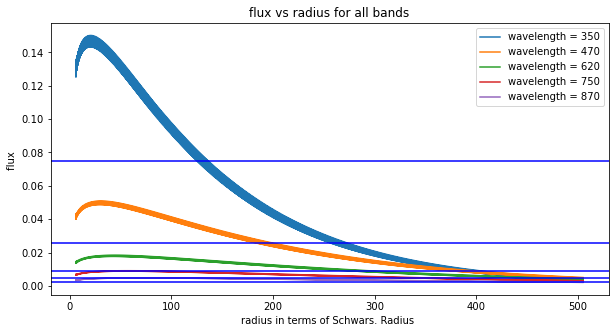

In [154]:
#More flux versus radius plotting

y1 = lum1
max_y1 = max(lum1)
y2 = lum2
max_y2 = max(lum2)
y3 = lum3
max_y3 = max(lum3)
y4 = lum4
max_y4 = max(lum4)
y5 = lum5
max_y5 = max(lum5)

plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'wavelength = 350')
plt.plot(rr, lum2, label = 'wavelength = 470')
plt.plot(rr, lum3, label = 'wavelength = 620')
plt.plot(rr, lum4, label = 'wavelength = 750')
plt.plot(rr, lum5, label = 'wavelength = 870') 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.axhline(y = max_y1/2.0, color = 'b')
plt.axhline(y = max_y2/2.0, color = 'b')
plt.axhline(y = max_y3/2.0, color = 'b')
plt.axhline(y = max_y4/2.0, color = 'b')
plt.axhline(y = max_y5/2.0, color = 'b')
plt.legend()
print("FWHM:", + max_y1/2.0)
print("FWHM:", + max_y2/2.0)
print("FWHM:", + max_y3/2.0)
print("FWHM:", + max_y4/2.0)
print("FWHM:", + max_y5/2.0)


In [155]:
def closest(lst, K):
      
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
      
# Driver code
y1 = lum1
max_y1 = max(lum1)
y2 = lum2
max_y2 = max(lum2)
y3 = lum3
max_y3 = max(lum3)
y4 = lum4
max_y4 = max(lum4)
y5 = lum5
max_y5 = max(lum5)
print(closest(lst, K))

9.35


8.67855476112234
7.103940857446119
5.884870625675303
5.167139429467357
4.595769847293492

BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 5

PLOTTING




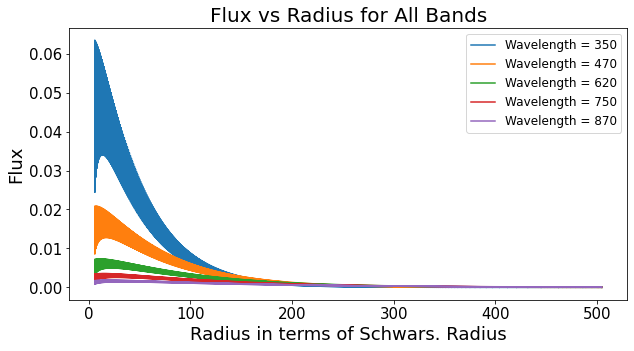

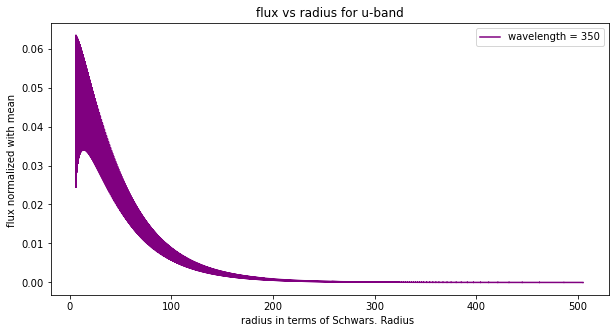

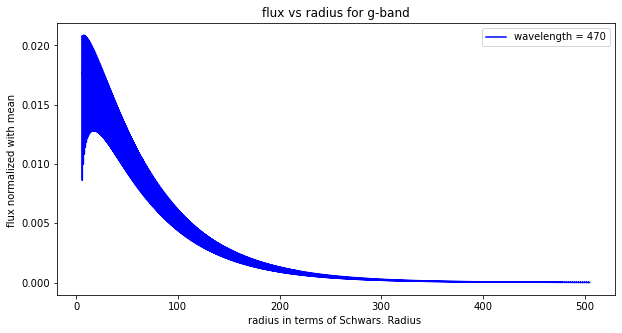

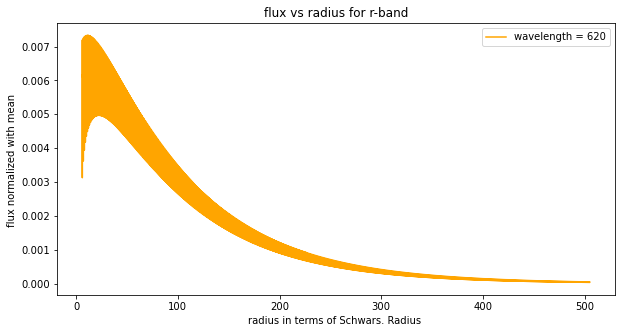

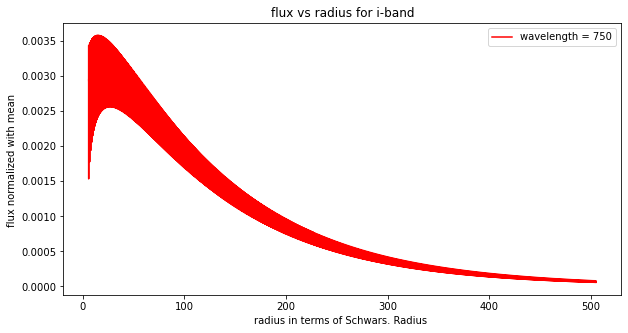

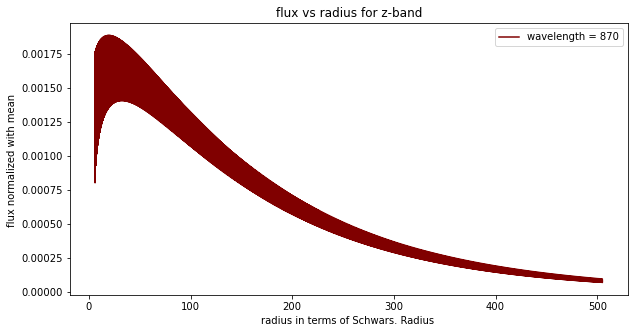


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs



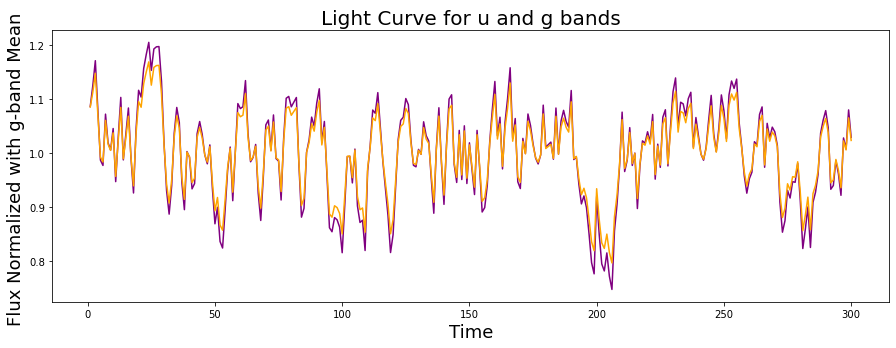

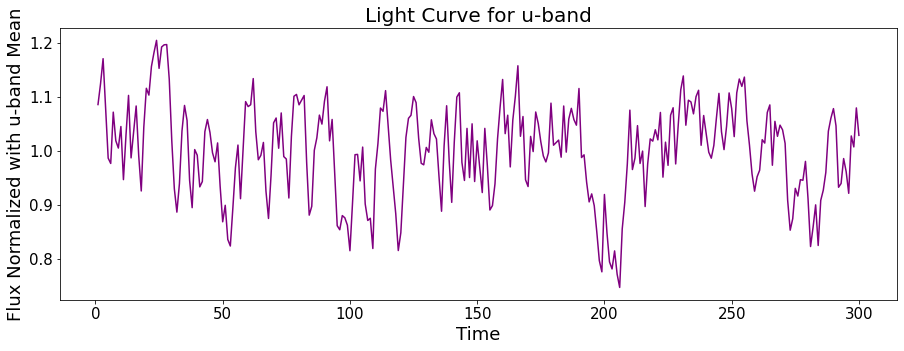

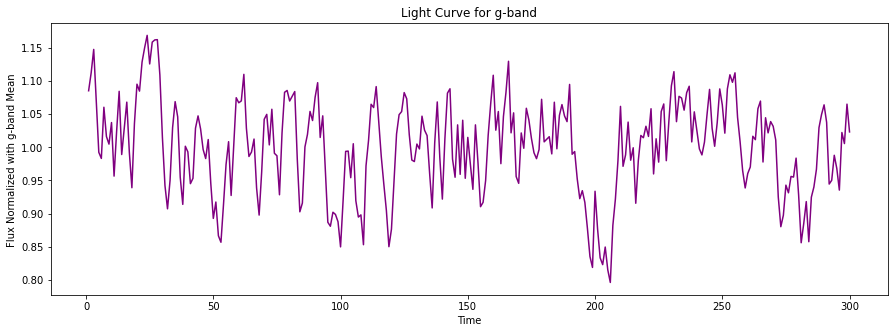

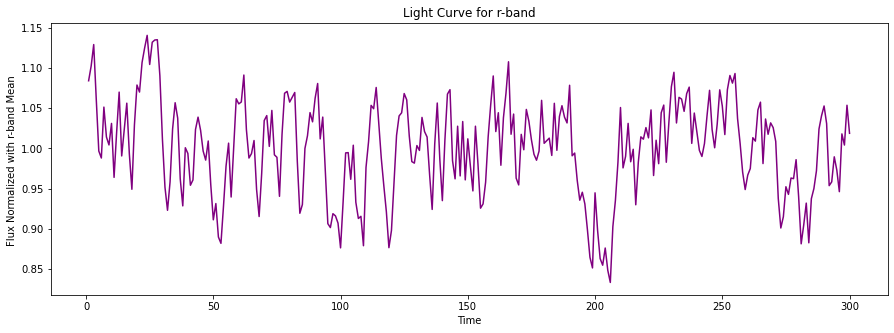

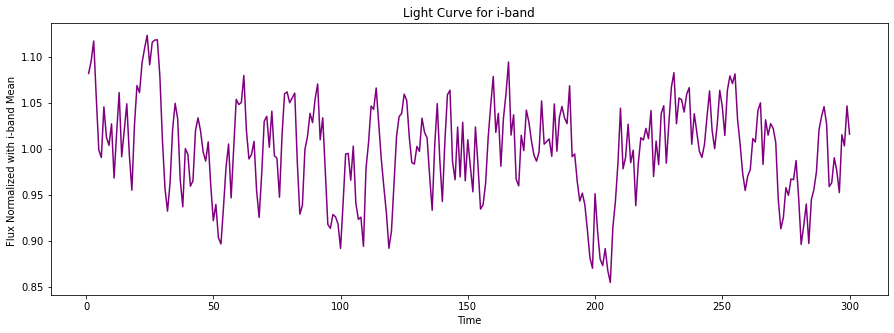

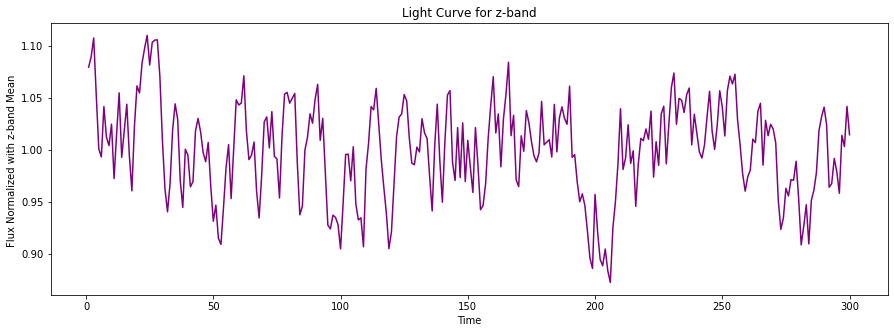

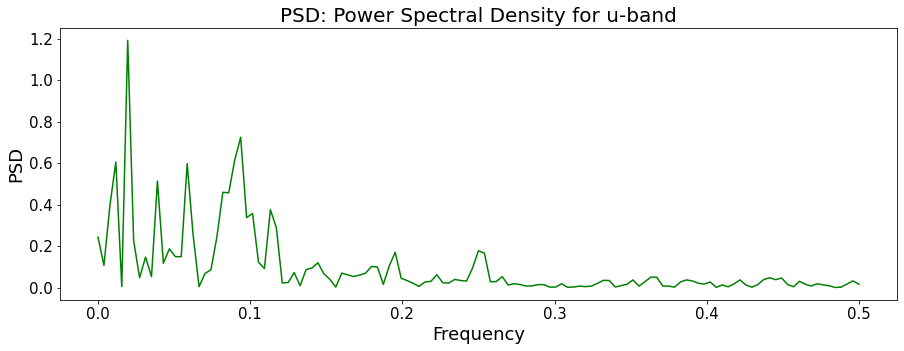

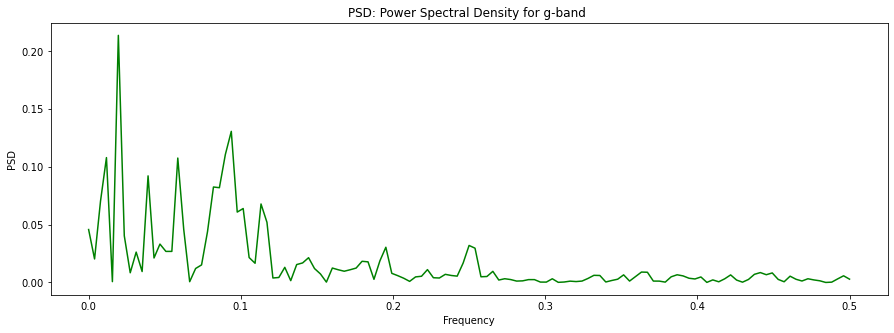

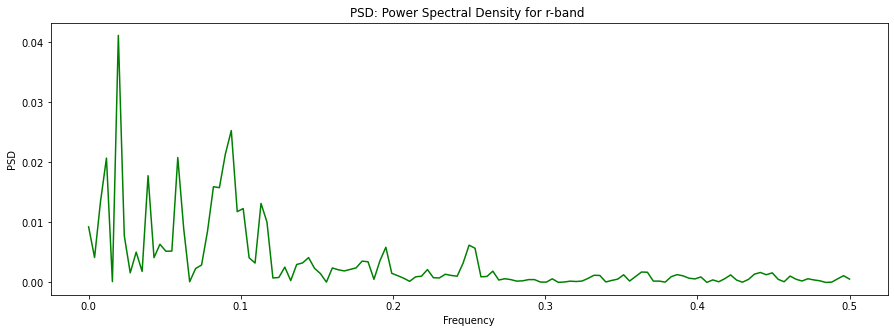

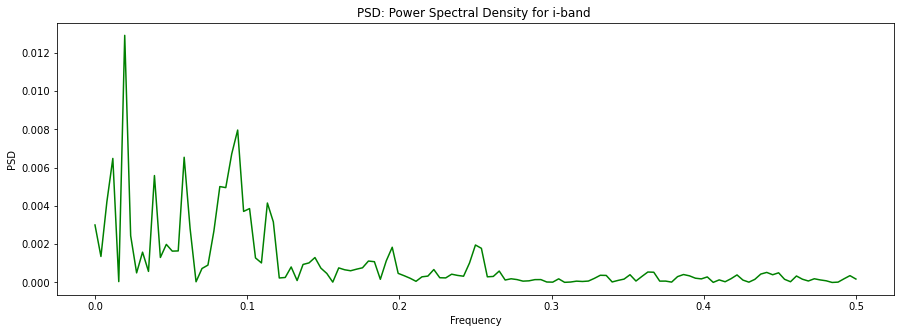

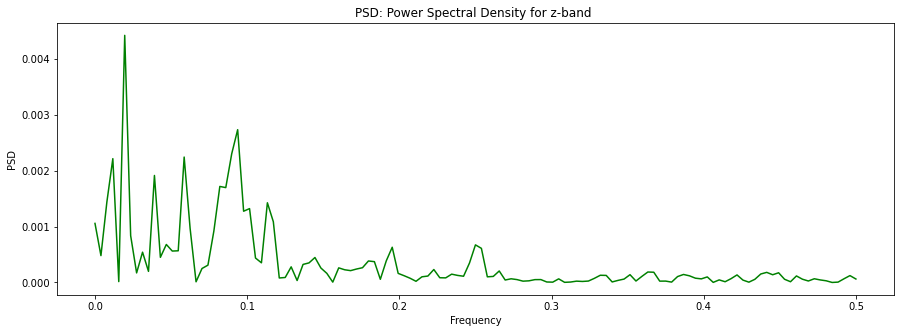

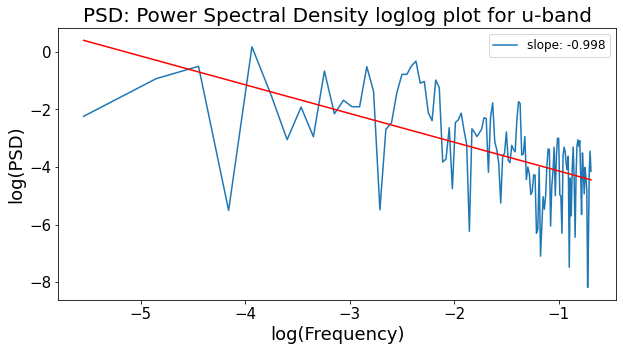


Slope: -0.9980565004132629 Intercept: -6.847510318739873


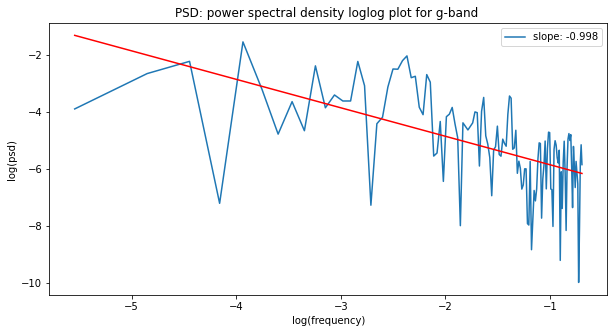


Slope: -0.9980670440219774 Intercept: -8.49044855474345


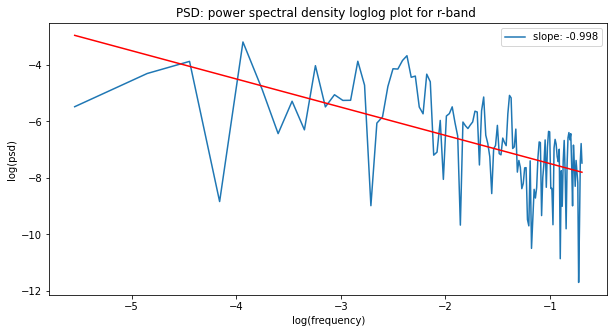


Slope: -0.9982068552389765 Intercept: -9.647278630219148


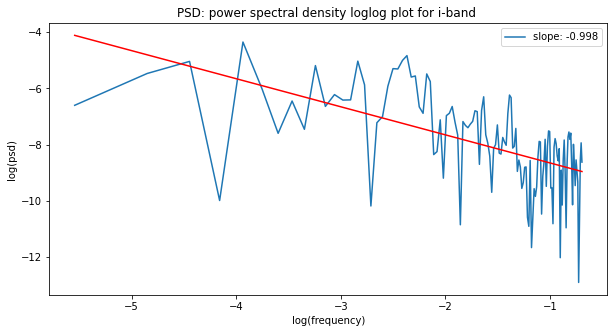


Slope: -0.9984198288934265 Intercept: -10.716499381184919


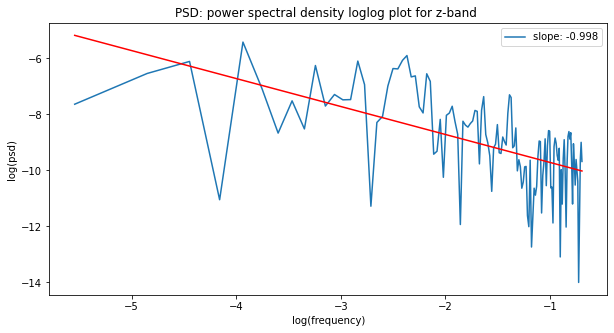


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.2216535772571588
u/r: 1.4747231185097558
u/i: 1.6795665918418905
u/z: 1.8883788896072011

g band

g/u: 0.8185626585281134
g/r: 1.2071532764802158
g/i: 1.3748304945931007
g/z: 1.5457564441852372

r band

r/u: 0.6780933908532775
r/g: 0.8283952166503432
r/i: 1.1389030054259501
r/z: 1.2804972444694938

i band

i/u: 0.5953916950106477
i/g: 0.7273623940789612
i/r: 0.8780378972009119
i/z: 1.1243251079055563

z band

z/u: 0.5295547442854588
z/g: 0.6469324477098308
z/r: 0.780946623914288
z/i: 0.889422457053232



In [158]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 3.8
            b = 0.55
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g5**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=((y1[t])**0.25)/tstar
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1])
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print(light1)
print(light2)
print(light3)
print(light4)
print(light5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 5")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'Wavelength = 350')
plt.plot(rr, lum2, label = 'Wavelength = 470')
plt.plot(rr, lum3, label = 'Wavelength = 620')
plt.plot(rr, lum4, label = 'Wavelength = 750')
plt.plot(rr, lum5, label = 'Wavelength = 870') 
plt.xlabel('Radius in terms of Schwars. Radius', size = 18) 
plt.ylabel('Flux', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Flux vs Radius for All Bands', size = 20)
plt.legend(prop={'size': 12})

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time', size = 18)
plt.ylabel('Flux Normalized with u-band Mean', size = 18)
plt.title('Light Curve for u and g bands', size = 20)# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time', size = 18)
plt.ylabel('Flux Normalized with u-band Mean', size = 18)
plt.title('Light Curve for u-band', size = 20)# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency', size = 18)
plt.ylabel('PSD', size = 18)
plt.title('PSD: Power Spectral Density for u-band', size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: Power Spectral Density loglog plot for u-band', size = 20) 
plt.xlabel('log(Frequency)', size = 18)
plt.ylabel('log(PSD)', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend(prop={'size': 12})
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_5 = light1
AV_g_5 = light2
AV_r_5 = light3
AV_i_5 = light4
AV_z_5 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_5 = (AV_u_5 / AV_g_5)
R_AV_ur_5 = (AV_u_5 / AV_r_5)
R_AV_ui_5 = (AV_u_5 / AV_i_5)
R_AV_uz_5 = (AV_u_5 / AV_z_5)

print("u/g:", + R_AV_ug_5)
print("u/r:", + R_AV_ur_5)
print("u/i:", + R_AV_ui_5)
print("u/z:", + R_AV_uz_5)

print()
print("g band")
print()
R_AV_gu_5 = AV_g_5/AV_u_5
R_AV_gr_5 = AV_g_5/AV_r_5
R_AV_gi_5 = AV_g_5/AV_i_5
R_AV_gz_5 = AV_g_5/AV_z_5

print("g/u:", + R_AV_gu_5)
print("g/r:", + R_AV_gr_5)
print("g/i:", + R_AV_gi_5)
print("g/z:", + R_AV_gz_5)
print()

print("r band")
print()
R_AV_ru_5 = AV_r_5/AV_u_5
R_AV_rg_5 = AV_r_5/AV_g_5
R_AV_ri_5 = AV_r_5/AV_i_5
R_AV_rz_5 = AV_r_5/AV_z_5

print("r/u:", + R_AV_ru_5)
print("r/g:", + R_AV_rg_5)
print("r/i:", + R_AV_ri_5)
print("r/z:", + R_AV_rz_5)
print()

print("i band")
print()
R_AV_iu_5 = AV_i_5/AV_u_5
R_AV_ig_5 = AV_i_5/AV_g_5
R_AV_ir_5 = AV_i_5/AV_r_5
R_AV_iz_5 = AV_i_5/AV_z_5

print("i/u:", + R_AV_iu_5)
print("i/g:", + R_AV_ig_5)
print("i/r:", + R_AV_ir_5)
print("i/z:", + R_AV_iz_5)
print()

print("z band")
print()
R_AV_zu_5 = AV_z_5/AV_u_5
R_AV_zg_5 = AV_z_5/AV_g_5
R_AV_zr_5 = AV_z_5/AV_r_5
R_AV_zi_5 = AV_z_5/AV_i_5

print("z/u:", + R_AV_zu_5)
print("z/g:", + R_AV_zg_5)
print("z/r:", + R_AV_zr_5)
print("z/i:", + R_AV_zi_5)
print()

4.644629395242251
3.413487107478883
2.5641422521992494
2.1169633240126537
1.7930031906257606

BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 6

PLOTTING




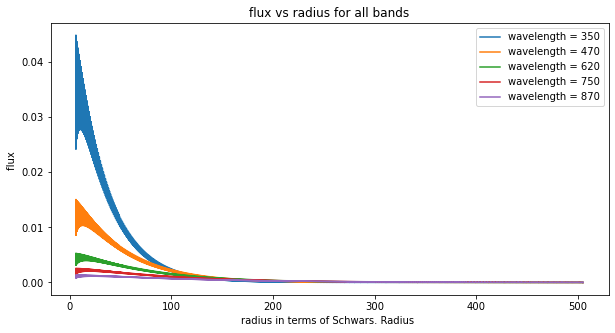

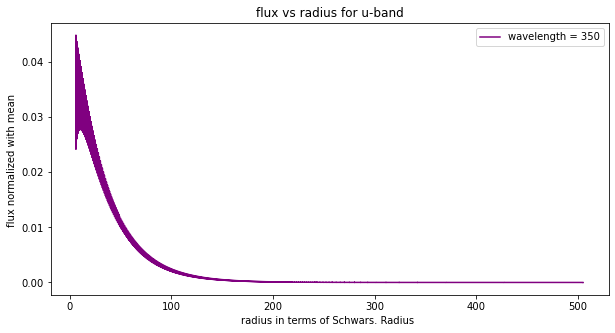

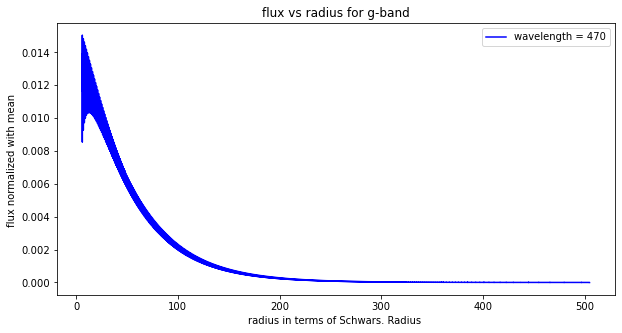

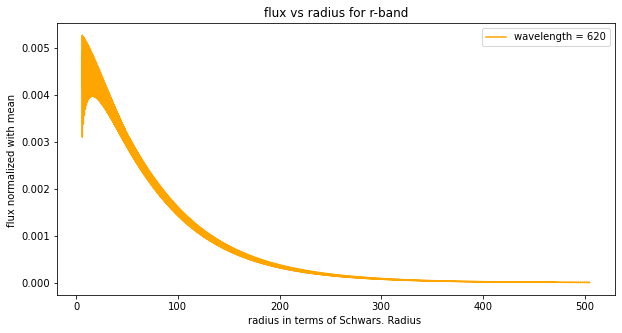

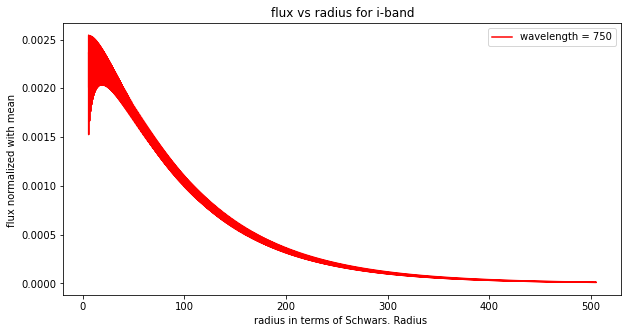

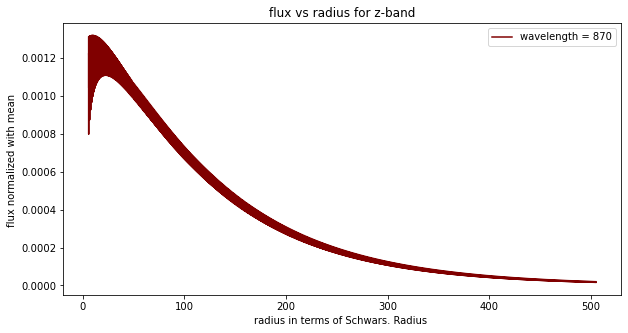


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -0.8303701943864394 Intercept: -7.567040298510344


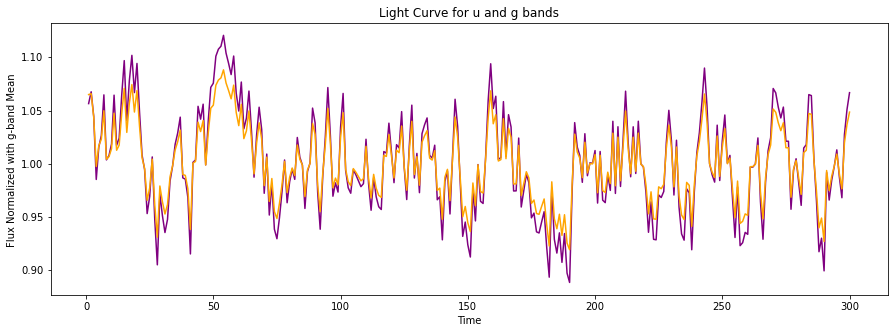

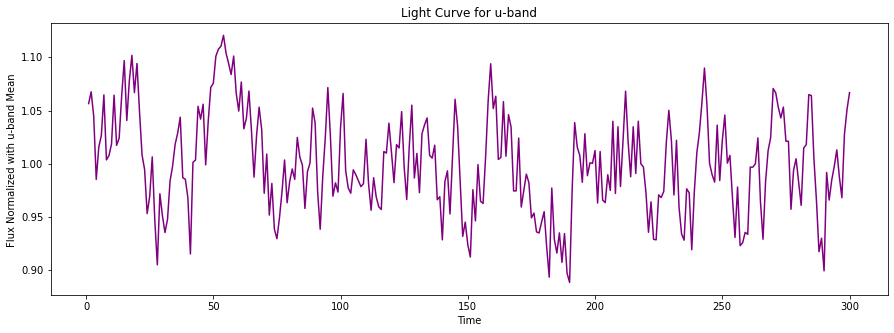

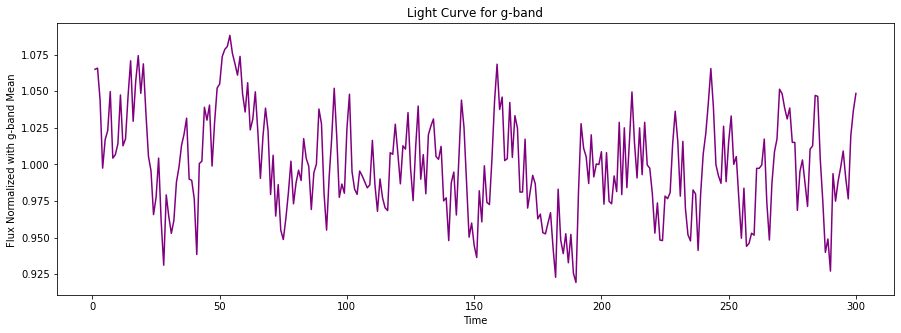

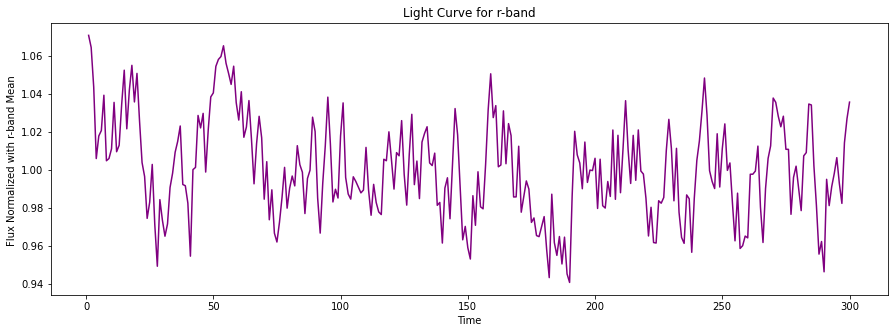

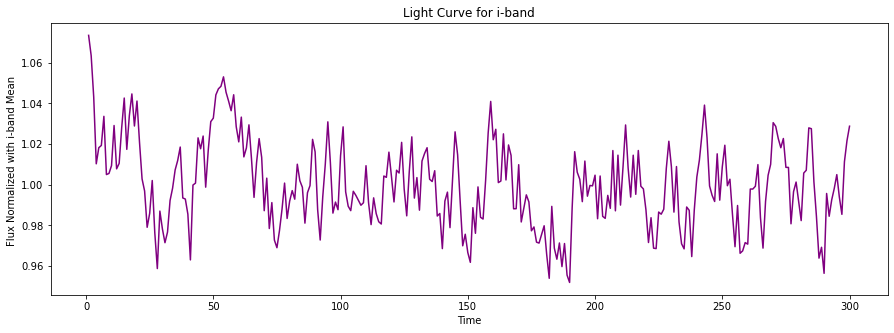

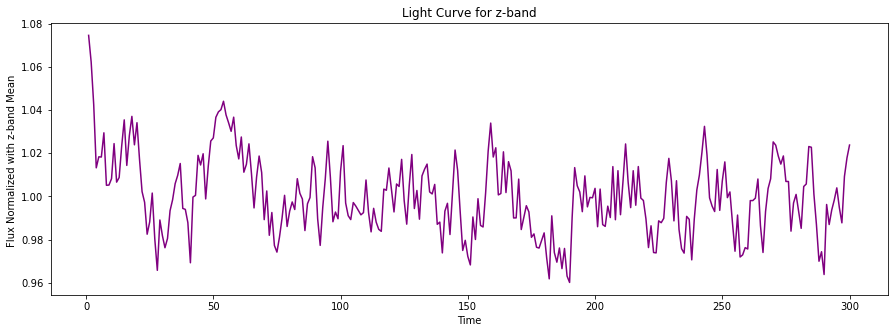

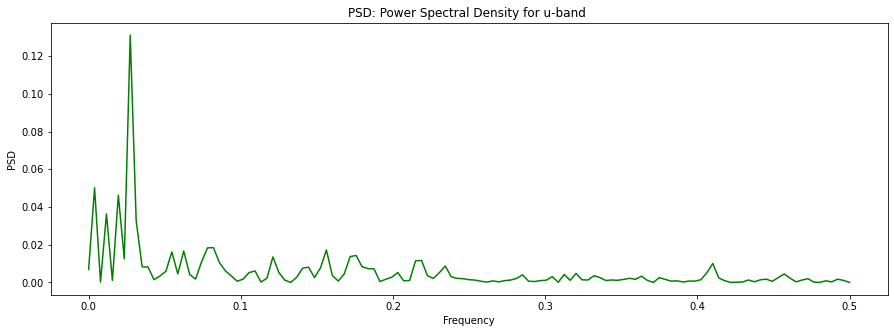

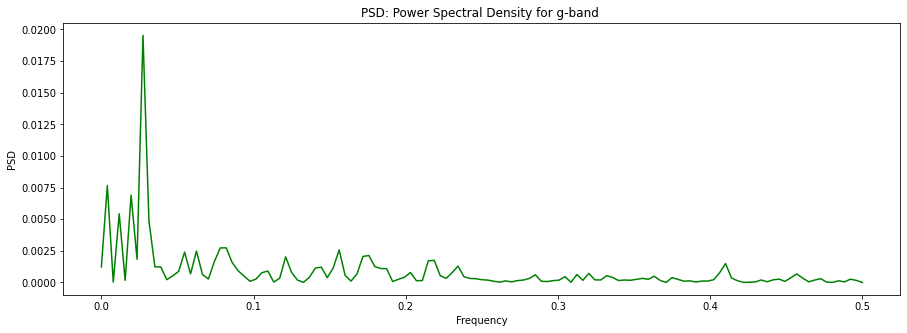

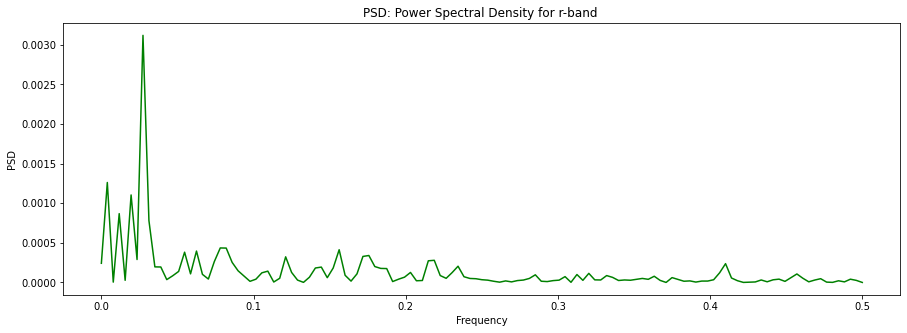

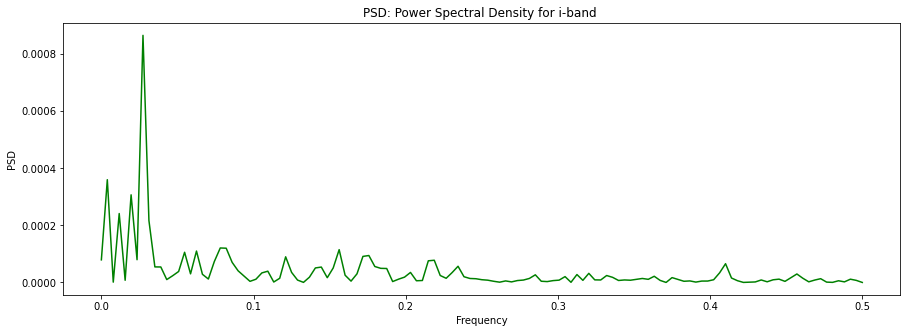

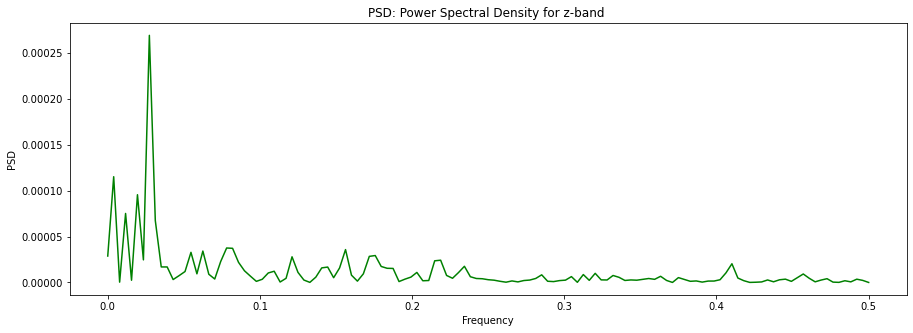

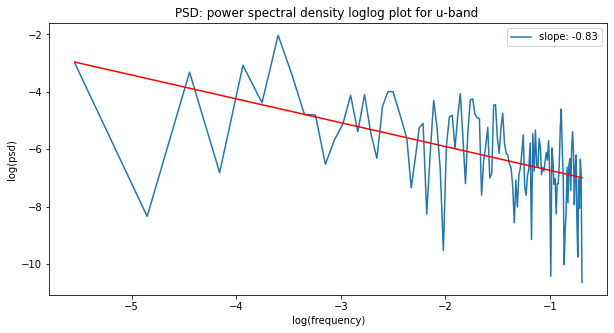


Slope: -0.8283932456794425 Intercept: -9.467184146450569


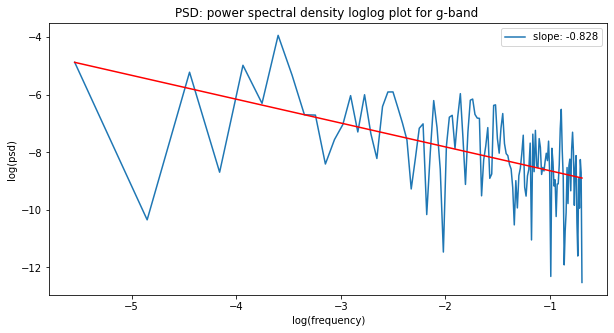


Slope: -0.8271357537130668 Intercept: -11.299266618211108


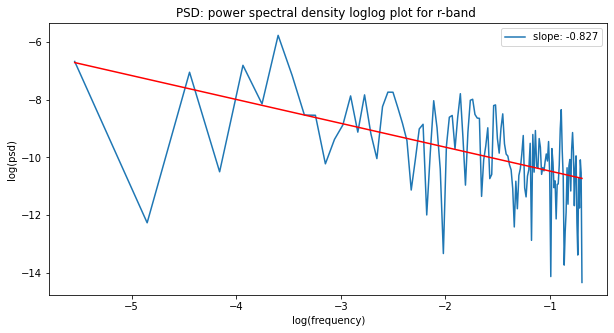


Slope: -0.8267829698336338 Intercept: -12.580493455673569


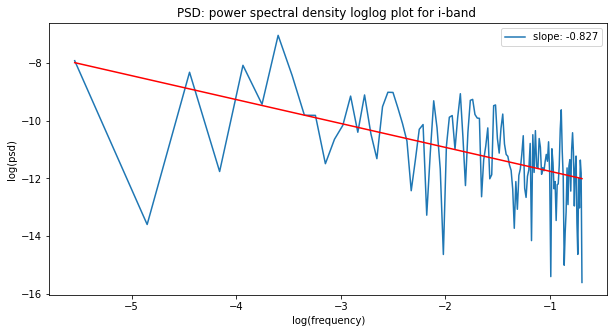


Slope: -0.826853294749936 Intercept: -13.747956328411792


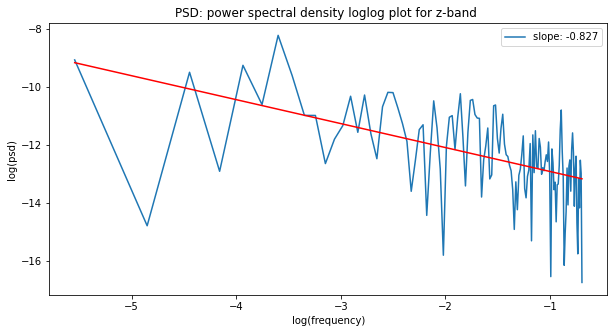


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.3606699685684938
u/r: 1.8113774269967198
u/i: 2.194005603478508
u/z: 2.59041892369487

g band

g/u: 0.7349320725084127
g/r: 1.3312393665176554
g/i: 1.6124450852595307
g/z: 1.9037819482560827

r band

r/u: 0.5520660603891974
r/g: 0.7511797090375013
r/i: 1.2112360299842033
r/z: 1.4300823699618517

i band

i/u: 0.4557873500480309
i/g: 0.6201761592637712
i/r: 0.8256029173876555
i/z: 1.1806801767451571

z band

z/u: 0.38603794577505635
z/g: 0.5252702395439918
z/r: 0.6992604209411207
z/i: 0.846969416185806



In [113]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 7.5
            b = 1.0
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g6**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=(y1[t])**0.25
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print(light1)
print(light2)
print(light3)
print(light4)
print(light5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 6")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'wavelength = 350')
plt.plot(rr, lum2, label = 'wavelength = 470')
plt.plot(rr, lum3, label = 'wavelength = 620')
plt.plot(rr, lum4, label = 'wavelength = 750')
plt.plot(rr, lum5, label = 'wavelength = 870') 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_6 = light1
AV_g_6 = light2
AV_r_6 = light3
AV_i_6 = light4
AV_z_6 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_6 = (AV_u_6 / AV_g_6)
R_AV_ur_6 = (AV_u_6 / AV_r_6)
R_AV_ui_6 = (AV_u_6 / AV_i_6)
R_AV_uz_6 = (AV_u_6 / AV_z_6)

print("u/g:", + R_AV_ug_6)
print("u/r:", + R_AV_ur_6)
print("u/i:", + R_AV_ui_6)
print("u/z:", + R_AV_uz_6)

print()
print("g band")
print()
R_AV_gu_6 = AV_g_6/AV_u_6
R_AV_gr_6 = AV_g_6/AV_r_6
R_AV_gi_6 = AV_g_6/AV_i_6
R_AV_gz_6 = AV_g_6/AV_z_6

print("g/u:", + R_AV_gu_6)
print("g/r:", + R_AV_gr_6)
print("g/i:", + R_AV_gi_6)
print("g/z:", + R_AV_gz_6)
print()

print("r band")
print()
R_AV_ru_6 = AV_r_6/AV_u_6
R_AV_rg_6 = AV_r_6/AV_g_6
R_AV_ri_6 = AV_r_6/AV_i_6
R_AV_rz_6 = AV_r_6/AV_z_6

print("r/u:", + R_AV_ru_6)
print("r/g:", + R_AV_rg_6)
print("r/i:", + R_AV_ri_6)
print("r/z:", + R_AV_rz_6)
print()

print("i band")
print()
R_AV_iu_6 = AV_i_6/AV_u_6
R_AV_ig_6 = AV_i_6/AV_g_6
R_AV_ir_6 = AV_i_6/AV_r_6
R_AV_iz_6 = AV_i_6/AV_z_6

print("i/u:", + R_AV_iu_6)
print("i/g:", + R_AV_ig_6)
print("i/r:", + R_AV_ir_6)
print("i/z:", + R_AV_iz_6)
print()

print("z band")
print()
R_AV_zu_6 = AV_z_6/AV_u_6
R_AV_zg_6 = AV_z_6/AV_g_6
R_AV_zr_6 = AV_z_6/AV_r_6
R_AV_zi_6 = AV_z_6/AV_i_6

print("z/u:", + R_AV_zu_6)
print("z/g:", + R_AV_zg_6)
print("z/r:", + R_AV_zr_6)
print("z/i:", + R_AV_zi_6)
print()

<ipython-input-14-c9211576b18a>:55: RuntimeWarning: invalid value encountered in double_scalars
  u1=(y1[t])**0.25
<ipython-input-14-c9211576b18a>:66: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1])
<ipython-input-14-c9211576b18a>:67: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
<ipython-input-14-c9211576b18a>:68: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
<ipython-input-14-c9211576b18a>:69: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the


BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 7

PLOTTING




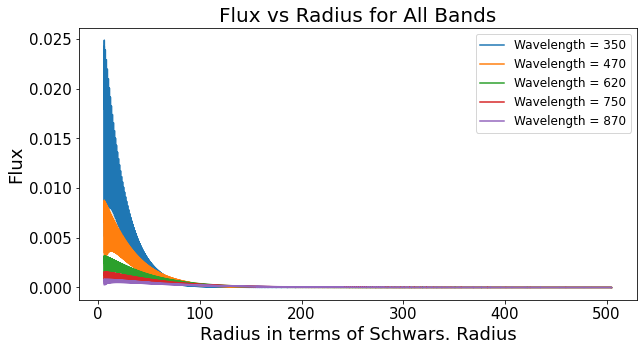

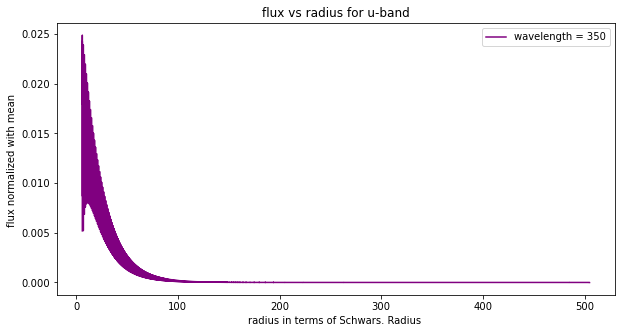

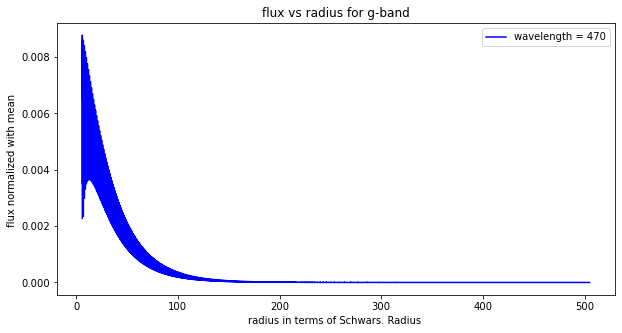

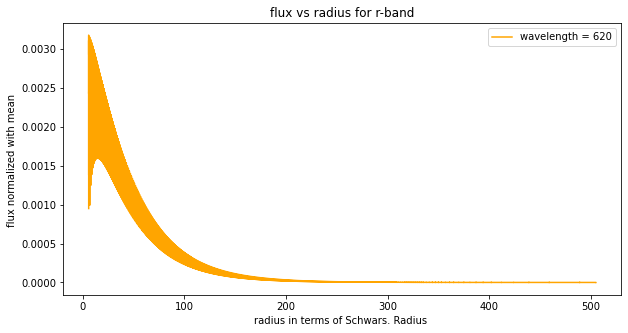

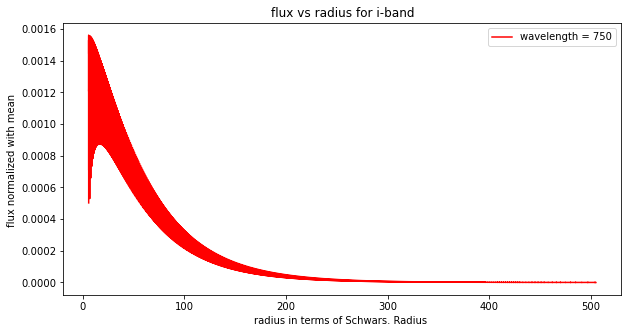

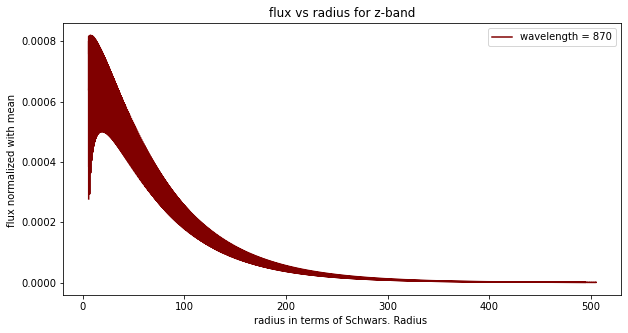


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -0.8467998527691027 Intercept: -7.736703281475925


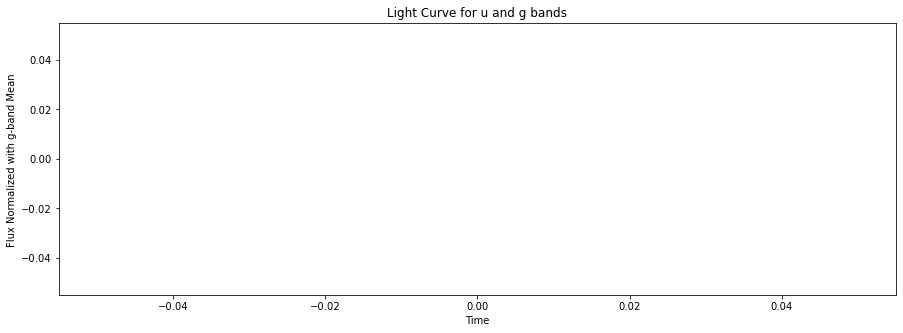

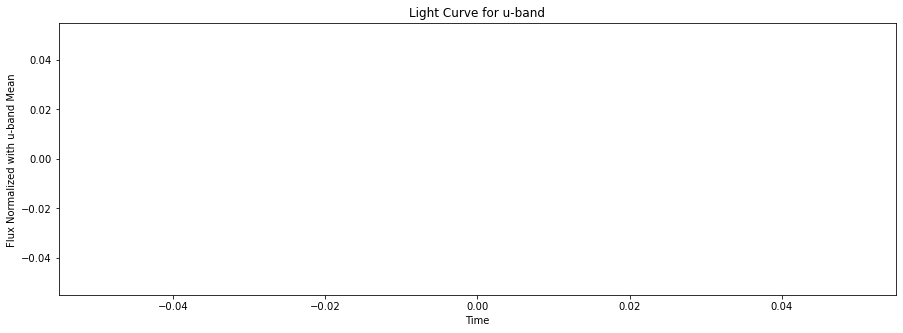

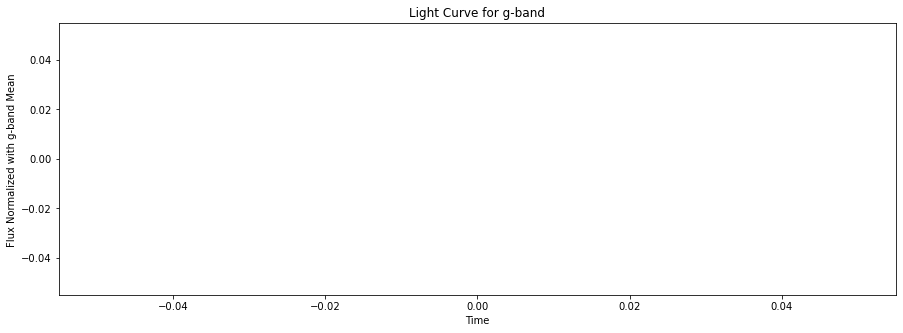

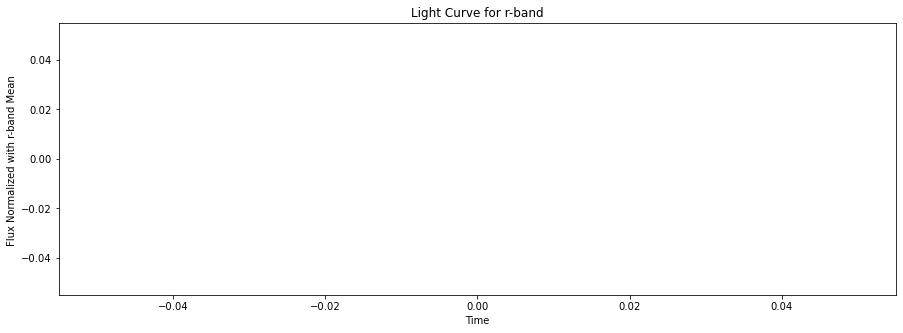

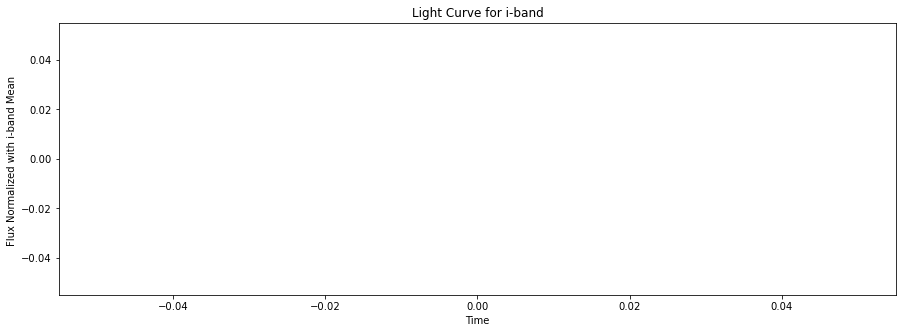

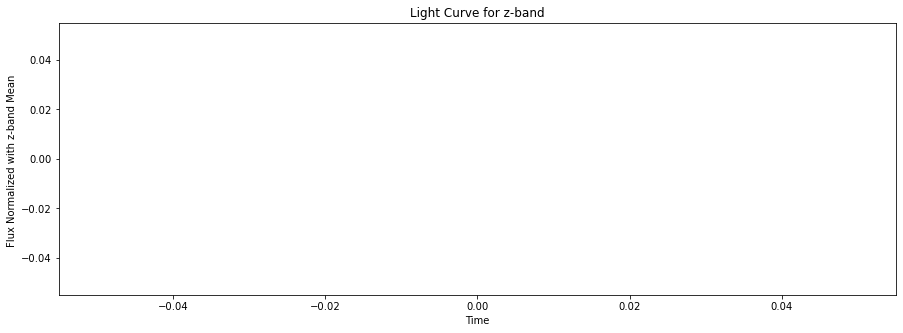

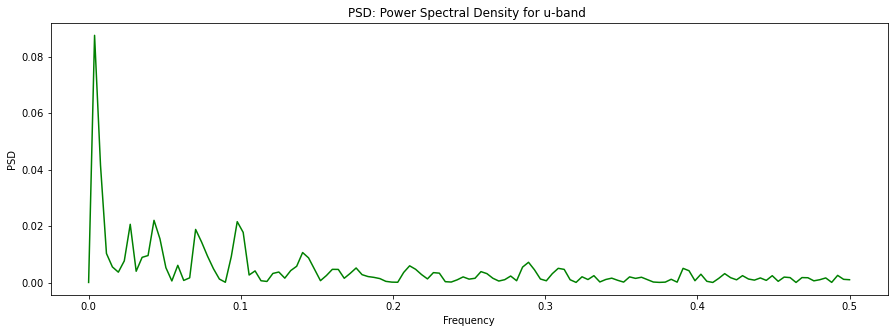

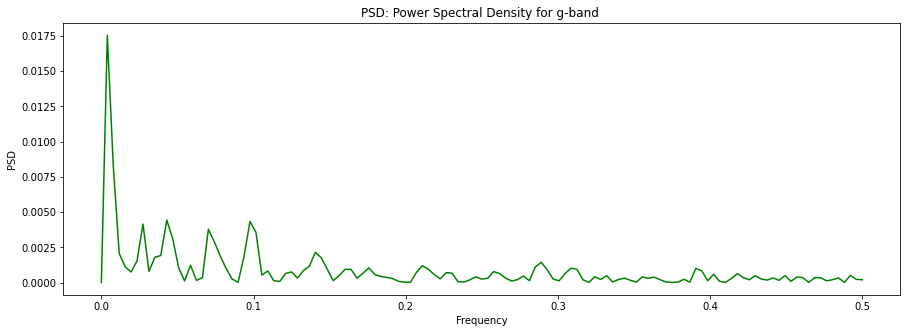

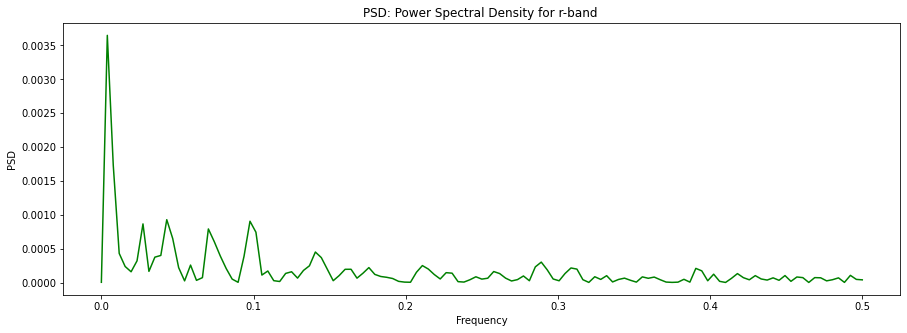

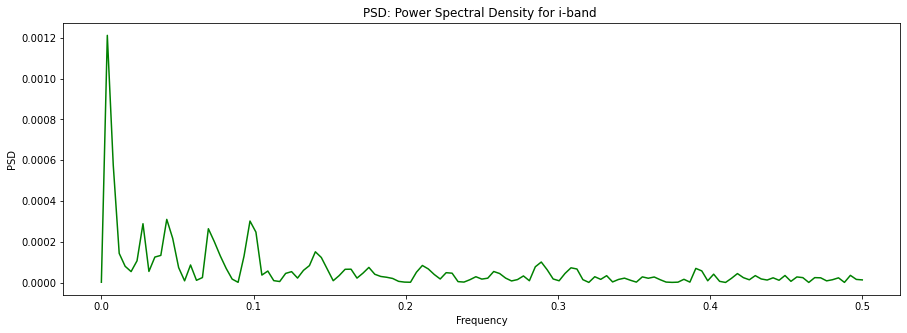

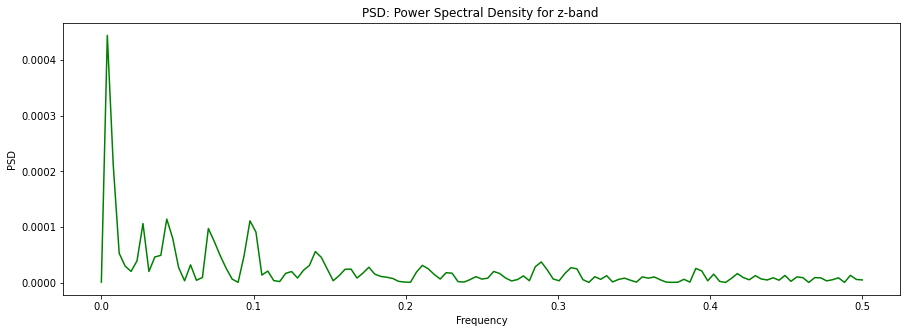

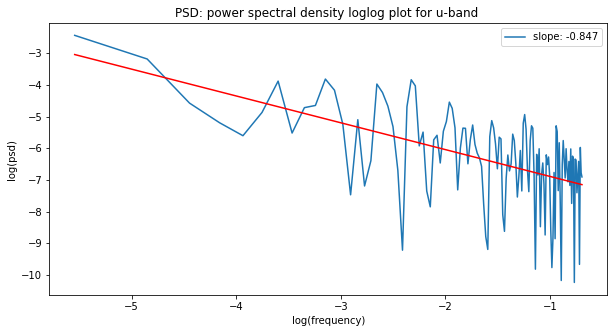


Slope: -0.846455749362083 Intercept: -9.340016203112025


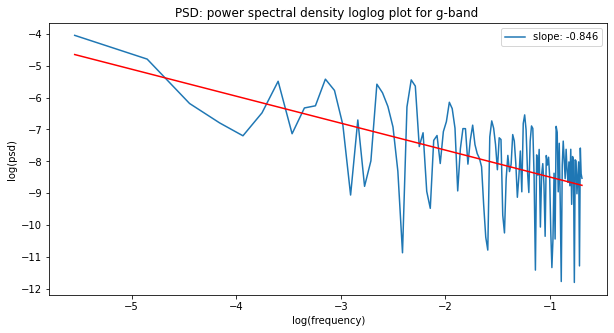


Slope: -0.8460113092767786 Intercept: -10.902427338636333


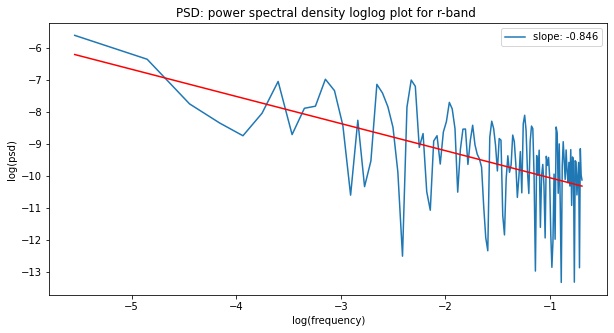


Slope: -0.8456781544231967 Intercept: -11.99880520406137


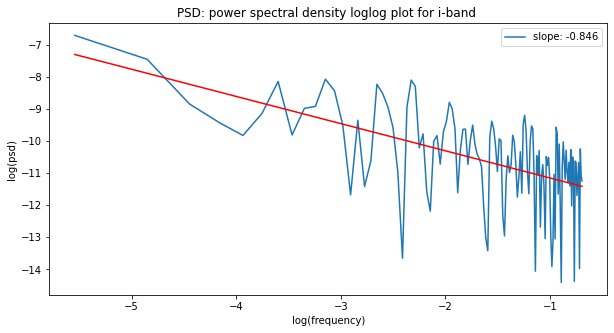


Slope: -0.845374833902845 Intercept: -12.997395160544729


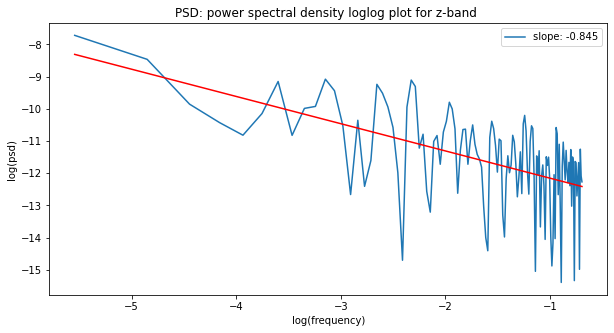


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: nan
u/r: nan
u/i: nan
u/z: nan

g band

g/u: nan
g/r: nan
g/i: nan
g/z: nan

r band

r/u: nan
r/g: nan
r/i: nan
r/z: nan

i band

i/u: nan
i/g: nan
i/r: nan
i/z: nan

z band

z/u: nan
z/g: nan
z/r: nan
z/i: nan



In [14]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
            c = 3.8
            b = 0.55
            phi = 0.7
            lambda1 = 350
            lambda2 = 470
            lambda3 = 620
            lambda4 = 750
            lambda5 = 890
            tstar = 25*(bhm_g7**0.25)
            if(t<N):
                #Initial value of the AR(1) process... not sure why it is 4. 
                y1[0]=4
                #This is the m_n perturbation(AR(1)) term
                y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
                #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
    
                #This is the accretion rate term
                u1=(y1[t])**0.25
                uu.append(u1)
            
                #These are luminosities and come from the equation for Flux in section 3.3 
                L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
                L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
                L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
                L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
                L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
            
                #We find FLUX by integrating it over some distance
                flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
                flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
                flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
                flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
                flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
                #filling our previously empty arrays with the fluxes
                lum1.append(flux1)
                lum2.append(flux2)
                lum3.append(flux3)
                lum4.append(flux4)
                lum5.append(flux5)
                tm[r,x1]=t 
                output1[r,x1] = flux1 
                output2[r,x1] = flux2
                output3[r,x1] = flux3 
                output4[r,x1] = flux4
                output5[r,x1] = flux5
                yy.append(u1)  
                rr.append(rin[r])
                t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for BLACK HOLE MASS GROUP 7")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'Wavelength = 350')
plt.plot(rr, lum2, label = 'Wavelength = 470')
plt.plot(rr, lum3, label = 'Wavelength = 620')
plt.plot(rr, lum4, label = 'Wavelength = 750')
plt.plot(rr, lum5, label = 'Wavelength = 870') 
plt.xlabel('Radius in terms of Schwars. Radius', size = 18) 
plt.ylabel('Flux', size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Flux vs Radius for All Bands', size = 20)
plt.legend(prop={'size': 12})

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'wavelength = 350')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'wavelength = 470')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'wavelength = 620')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'wavelength = 750')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'wavelength = 870')
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_7 = light1
AV_g_7 = light2
AV_r_7 = light3
AV_i_7 = light4
AV_z_7 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_7 = (AV_u_7 / AV_g_7)
R_AV_ur_7 = (AV_u_7 / AV_r_7)
R_AV_ui_7 = (AV_u_7 / AV_i_7)
R_AV_uz_7 = (AV_u_7 / AV_z_7)

print("u/g:", + R_AV_ug_7)
print("u/r:", + R_AV_ur_7)
print("u/i:", + R_AV_ui_7)
print("u/z:", + R_AV_uz_7)

print()
print("g band")
print()
R_AV_gu_7 = AV_g_7/AV_u_7
R_AV_gr_7 = AV_g_7/AV_r_7
R_AV_gi_7 = AV_g_7/AV_i_7
R_AV_gz_7 = AV_g_7/AV_z_7

print("g/u:", + R_AV_gu_7)
print("g/r:", + R_AV_gr_7)
print("g/i:", + R_AV_gi_7)
print("g/z:", + R_AV_gz_7)
print()

print("r band")
print()
R_AV_ru_7 = AV_r_7/AV_u_7
R_AV_rg_7 = AV_r_7/AV_g_7
R_AV_ri_7 = AV_r_7/AV_i_7
R_AV_rz_7 = AV_r_7/AV_z_7

print("r/u:", + R_AV_ru_7)
print("r/g:", + R_AV_rg_7)
print("r/i:", + R_AV_ri_7)
print("r/z:", + R_AV_rz_7)
print()

print("i band")
print()
R_AV_iu_7 = AV_i_7/AV_u_7
R_AV_ig_7 = AV_i_7/AV_g_7
R_AV_ir_7 = AV_i_7/AV_r_7
R_AV_iz_7 = AV_i_7/AV_z_7

print("i/u:", + R_AV_iu_7)
print("i/g:", + R_AV_ig_7)
print("i/r:", + R_AV_ir_7)
print("i/z:", + R_AV_iz_7)
print()

print("z band")
print()
R_AV_zu_7 = AV_z_7/AV_u_7
R_AV_zg_7 = AV_z_7/AV_g_7
R_AV_zr_7 = AV_z_7/AV_r_7
R_AV_zi_7 = AV_z_7/AV_i_7

print("z/u:", + R_AV_zu_7)
print("z/g:", + R_AV_zg_7)
print("z/r:", + R_AV_zr_7)
print("z/i:", + R_AV_zi_7)
print()

In [47]:
results_ug = []
results_ug.extend((R_AV_ug_1, R_AV_ug_2, R_AV_ug_3, R_AV_ug_4, R_AV_ug_5, R_AV_ug_6, R_AV_ug_7))

results_ur = []
results_ur.extend((R_AV_ur_1, R_AV_ur_2, R_AV_ur_3, R_AV_ur_4, R_AV_ur_5, R_AV_ur_6, R_AV_ur_7))

results_ui = []
results_ui.extend((R_AV_ui_1, R_AV_ui_2, R_AV_ui_3, R_AV_ui_4, R_AV_ui_5, R_AV_ui_6, R_AV_ui_7))

results_uz = []
results_uz.extend((R_AV_uz_1, R_AV_uz_2,R_AV_uz_3,R_AV_uz_4,R_AV_uz_5, R_AV_uz_6, R_AV_uz_7))

results_gu = []
results_gu.extend((R_AV_gu_1, R_AV_gu_2, R_AV_gu_3, R_AV_gu_4, R_AV_gu_5, R_AV_gu_6, R_AV_gu_7))

results_gr = []
results_gr.extend((R_AV_gr_1, R_AV_gr_2, R_AV_gr_3, R_AV_gr_4, R_AV_gr_5, R_AV_gr_6, R_AV_gr_7))

results_gi = []
results_gi.extend((R_AV_gi_1, R_AV_gi_2, R_AV_gi_3, R_AV_gi_4, R_AV_gi_5, R_AV_gi_6, R_AV_gi_7))

results_gz = []
results_gz.extend((R_AV_gz_1, R_AV_gz_2, R_AV_gz_3, R_AV_gz_4, R_AV_gz_5, R_AV_gz_6, R_AV_gz_7))

results_ru = []
results_ru.extend((R_AV_ru_1, R_AV_ru_2, R_AV_ru_3, R_AV_ru_4, R_AV_ru_5, R_AV_ru_6, R_AV_ru_7))

results_rg = []
results_rg.extend((R_AV_rg_1, R_AV_rg_2, R_AV_rg_3, R_AV_rg_4, R_AV_rg_5, R_AV_rg_6, R_AV_rg_7))

results_ri = []
results_ri.extend((R_AV_ri_1, R_AV_ri_2, R_AV_ri_3, R_AV_ri_4, R_AV_ri_5, R_AV_ri_6, R_AV_ri_7))

results_rz = []
results_rz.extend((R_AV_rz_1, R_AV_rz_2, R_AV_rz_3, R_AV_rz_4, R_AV_rz_5, R_AV_rz_6, R_AV_rz_7))

results_iu = []
results_iu.extend((R_AV_iu_1, R_AV_iu_2, R_AV_iu_3, R_AV_iu_4, R_AV_iu_5, R_AV_iu_6, R_AV_iu_7))

results_ig = []
results_ig.extend((R_AV_ig_1, R_AV_ig_2, R_AV_ig_3, R_AV_ig_4, R_AV_ig_5, R_AV_ig_6, R_AV_ig_7))

results_ir = []
results_ir.extend((R_AV_ir_1, R_AV_ir_2, R_AV_ir_3, R_AV_ir_4, R_AV_ir_5, R_AV_ir_6, R_AV_ir_7))

results_iz = []
results_iz.extend((R_AV_iz_1, R_AV_iz_2, R_AV_iz_3, R_AV_iz_4, R_AV_iz_5, R_AV_iz_6, R_AV_iz_7))

results_zu = []
results_zu.extend((R_AV_zu_1, R_AV_zu_2, R_AV_zu_3, R_AV_zu_4, R_AV_zu_5, R_AV_zu_6, R_AV_zu_7))

results_zg = []
results_zg.extend((R_AV_zg_1, R_AV_zg_2, R_AV_zg_3, R_AV_zg_4, R_AV_zg_5, R_AV_zg_6, R_AV_zg_7))

results_zr = []
results_zr.extend((R_AV_zr_1, R_AV_zr_2, R_AV_zr_3, R_AV_zr_4, R_AV_zr_5, R_AV_zr_6, R_AV_zr_7))

results_zi = []
results_zi.extend((R_AV_zi_1, R_AV_zi_2, R_AV_zi_3, R_AV_zi_4, R_AV_zi_5, R_AV_zi_6, R_AV_zi_7))

In [48]:
all_results = [['u/g', results_ug], ['u/r', results_ur], ['u/i', results_ui], ['u/z', results_uz], ['g/u', results_gu], ['g/r', results_gr], ['g/i', results_gi], ['g/z', results_gz], ['r/u', results_ru], ['r/g', results_rg], ['r/i', results_ri], ['r/z', results_rz], ['i/u', results_iu], ['i/g', results_ig], ['i/r', results_ir], ['i/z', results_iz], ['z/u', results_zu], ['z/r', results_zr], ['z/g', results_zg], ['z/i', results_zi]]
#for i in zip(results_ug, results_ur, results_ui, results_uz, results_gu, results_gr, results_gi, results_gz, results_ru, results_rg, results_ri, results_rz, results_iu, results_ig, results_ir, results_iz, results_zu, results_zg, results_zr, results_zi):
#    all_results.append(i)

df_results = pd.DataFrame(all_results)

In [49]:
print(df_results)

      0                                                  1
0   u/g  [1.1961987584106732, 1.2278103973269634, 1.238...
1   u/r  [1.3852235775680208, 1.4893155922303012, 1.506...
2   u/i  [1.5115699506134326, 1.700286451593348, 1.7222...
3   u/z  [1.619705366698719, 1.9125948674412534, 1.9407...
4   g/u  [0.8359814729524111, 0.8144579995226267, 0.807...
5   g/r  [1.1580212467437225, 1.212984997905747, 1.2172...
6   g/i  [1.2636444737844206, 1.3848119019801435, 1.391...
7   g/z  [1.3540436782017202, 1.5577281896334465, 1.567...
8   r/u  [0.7219051250597815, 0.6714493591666932, 0.663...
9   r/g  [0.8635420142868124, 0.8244125044633926, 0.821...
10  r/i  [1.0912100942341978, 1.1416562483221644, 1.142...
11  r/z  [1.169273605306638, 1.2842105980889362, 1.2878...
12  i/u  [0.6615638261359822, 0.5881361926179524, 0.580...
13  i/g  [0.7913618274332763, 0.7221197323406155, 0.718...
14  i/r  [0.9164138100296733, 0.8759204020208802, 0.874...
15  i/z  [1.0715384796061884, 1.1248662633575361, 1.126.

In [50]:
#exporting to excel
df_results.to_excel("ResearchBHMSimData.xlsx", sheet_name='Sheet_name1')

In [115]:
print("Group 1")
print()
print("u-band:", + AV_u_1)
print("g-band:", + AV_g_1)
print("r-band:", + AV_r_1)
print("i-band:", + AV_i_1)
print("z-band:", + AV_z_1)
print()

print("Group 2")
print()
print("u-band:", + AV_u_2)
print("g-band:", + AV_g_2)
print("r-band:", + AV_r_2)
print("i-band:", + AV_i_2)
print("z-band:", + AV_z_2)
print()

print("Group 3")
print()
print("u-band:", + AV_u_3)
print("g-band:", + AV_g_3)
print("r-band:", + AV_r_3)
print("i-band:", + AV_i_3)
print("z-band:", + AV_z_3)
print()

print("Group 4")
print()
print("u-band:", + AV_u_4)
print("g-band:", + AV_g_4)
print("r-band:", + AV_r_4)
print("i-band:", + AV_i_4)
print("z-band:", + AV_z_4)
print()

print("Group 5")
print()
print("u-band:", + AV_u_5)
print("g-band:", + AV_g_5)
print("r-band:", + AV_r_5)
print("i-band:", + AV_i_5)
print("z-band:", + AV_z_5)
print()

print("Group 6")
print()
print("u-band:", + AV_u_6)
print("g-band:", + AV_g_6)
print("r-band:", + AV_r_6)
print("i-band:", + AV_i_6)
print("z-band:", + AV_z_6)
print()

print("Group 7")
print()
print("u-band:", + AV_u_7)
print("g-band:", + AV_g_7)
print("r-band:", + AV_r_7)
print("i-band:", + AV_i_7)
print("z-band:", + AV_z_7)
print()

Group 1

u-band: 1.34098254050792
g-band: 1.067659400160588
r-band: 0.8866078087263098
i-band: 0.7931058327877476
z-band: 0.7255665438616737

Group 2

u-band: 1.6929370200297724
g-band: 1.309764164851782
r-band: 1.057263916558145
i-band: 0.9270962370436208
z-band: 0.8330853601201424

Group 3

u-band: 2.4013236520676755
g-band: 1.8141479263100742
r-band: 1.42507707538151
i-band: 1.2251473701805689
z-band: 1.0812319524881404

Group 4

u-band: 2.8070340999469297
g-band: 2.100011665758964
r-band: 1.6276503882092292
i-band: 1.38411437421719
z-band: 1.208268179887322

Group 5

u-band: 3.441871070251695
g-band: 2.550746413424513
r-band: 1.9433578972953243
i-band: 1.62795528604329
z-band: 1.4009296648464495

Group 6

u-band: 4.644629395242251
g-band: 3.413487107478883
r-band: 2.5641422521992494
i-band: 2.1169633240126537
z-band: 1.7930031906257606

Group 7

u-band: 7.037588830975177
g-band: 5.217770515119866
r-band: 3.937052544674343
i-band: 3.246234053127176
z-band: 2.733552483272263

